## First Dataset

In [ ]:
library(readr)
library(dplyr)
dataset <- read.csv('/content/Train.csv') 
# summary(dataset)
dataset <- dataset %>% select("Customer_rating","Cost_of_the_Product", "Prior_purchases","Reached.on.Time_Y.N","Customer_care_calls","Discount_offered")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
#checking null values
sapply(dataset, function(x) sum(is.na(x)))

Customer_rating Cost_of_the_Product     Prior_purchases Reached.on.Time_Y.N 
                  0                   0                   0                   0 
Customer_care_calls    Discount_offered 
                  0                   0

Warning message:
“Use of `dataset$Customer_rating` is discouraged. Use `Customer_rating` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



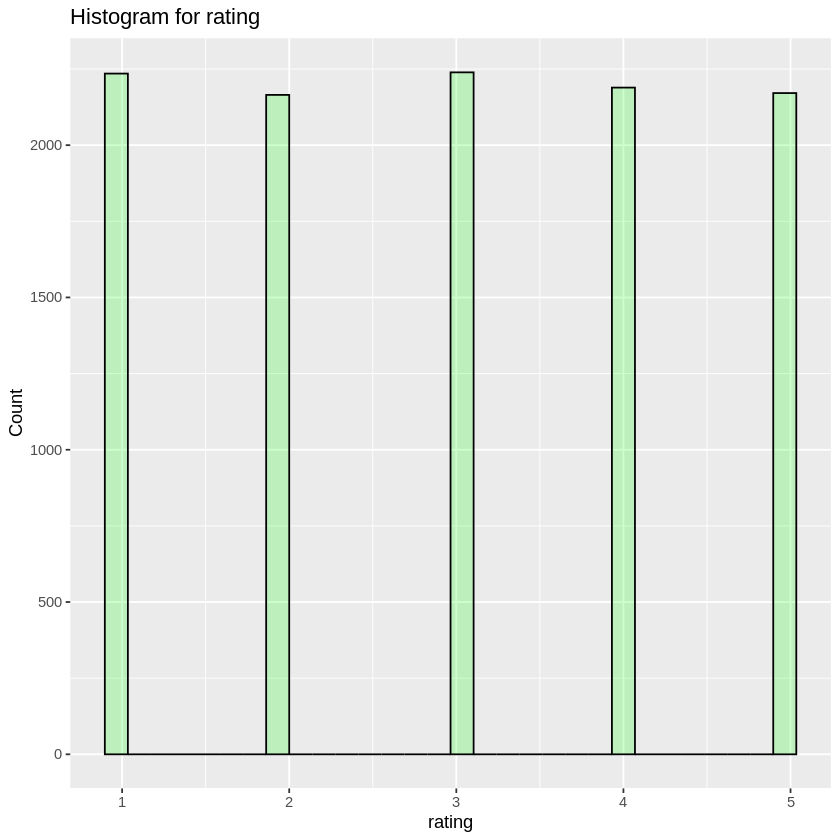

In [ ]:
#Histogram for customer rating
library(ggplot2)
ggplot(data=dataset, aes(dataset$Customer_rating)) + 
  geom_histogram(col="black", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for rating") +
  labs(x="rating", y="Count")

Loading required package: GGally

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘GGally’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



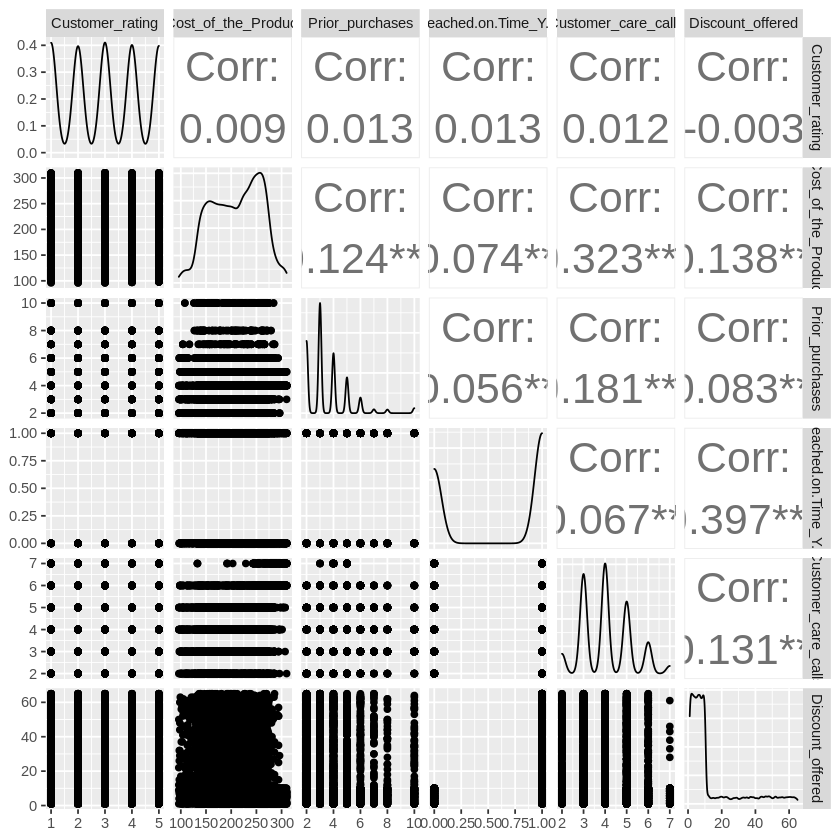

In [ ]:
#checking correlation/potential relationship between variables
if (!require(GGally)) install.packages("GGally")
library(GGally)
ggpairs(dataset, 
        upper = list(continuous = wrap("cor", size = 9))) 

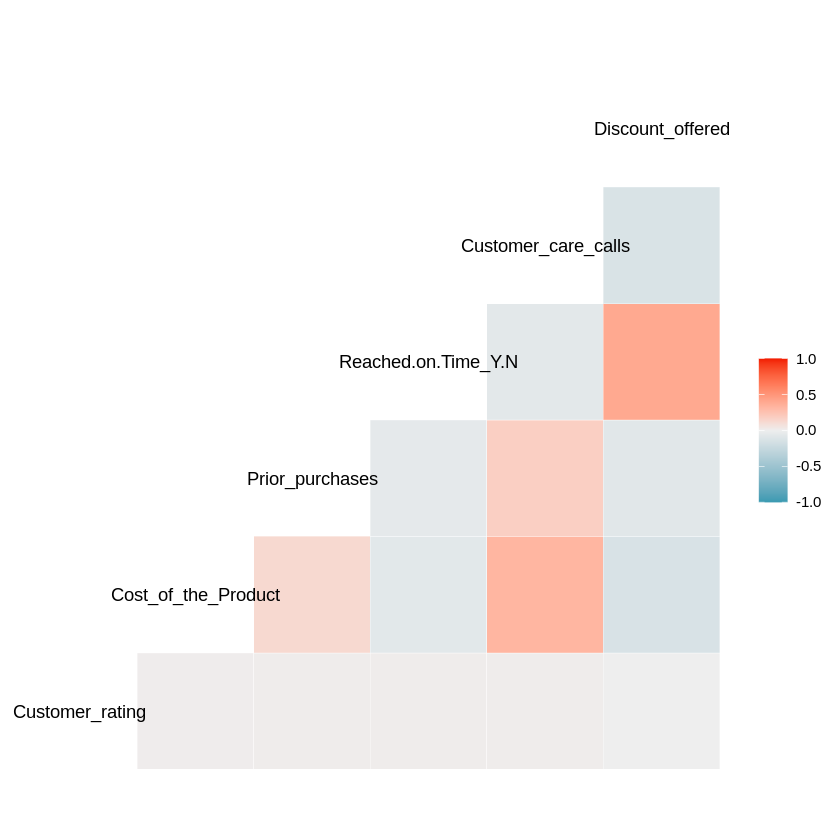

In [ ]:
#visualizing correlation between variables
ggcorr(dataset, method = c("everything", "pearson")) 

In [ ]:
ap <- available.packages()
"car" %in% rownames(ap)

[1] TRUE

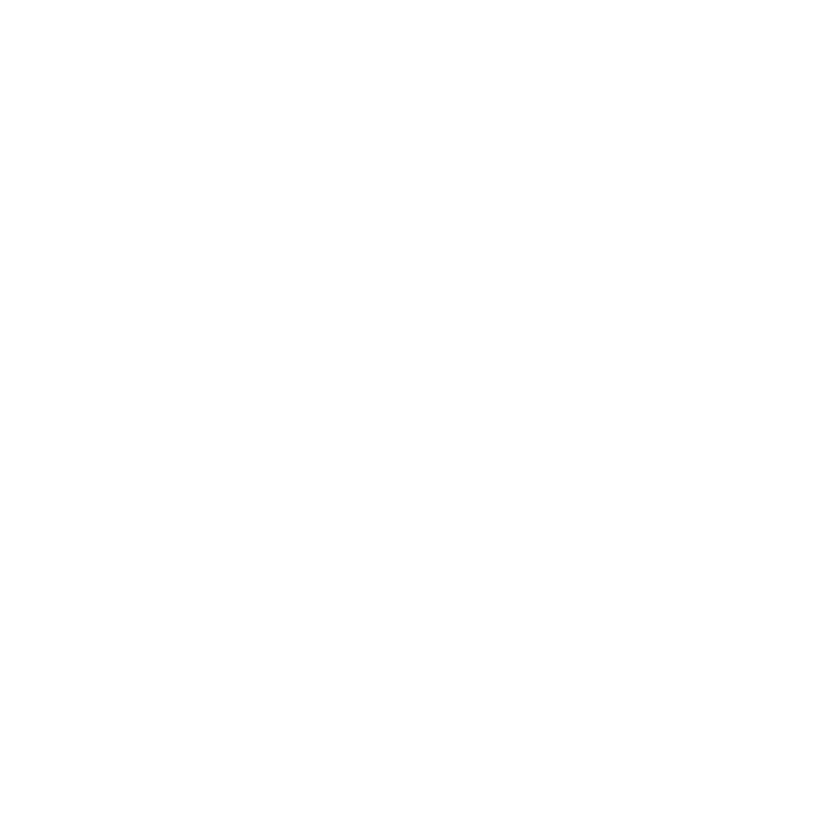

[1] " plot the 4 diagnostics plots for a linear model of Customer_rating vs.  Cost_of_the_Product"


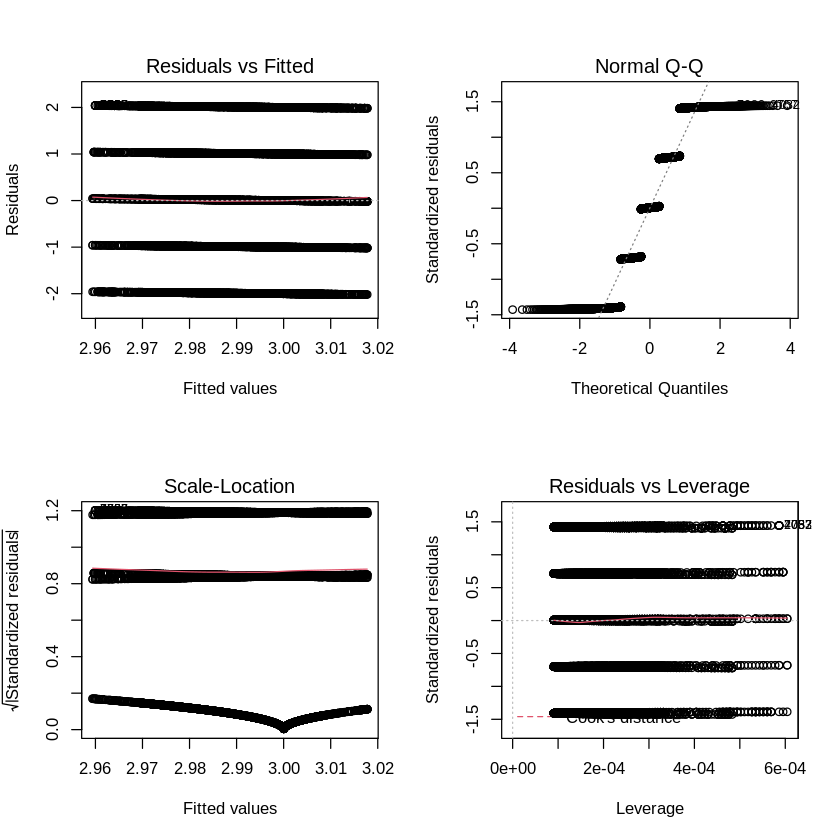

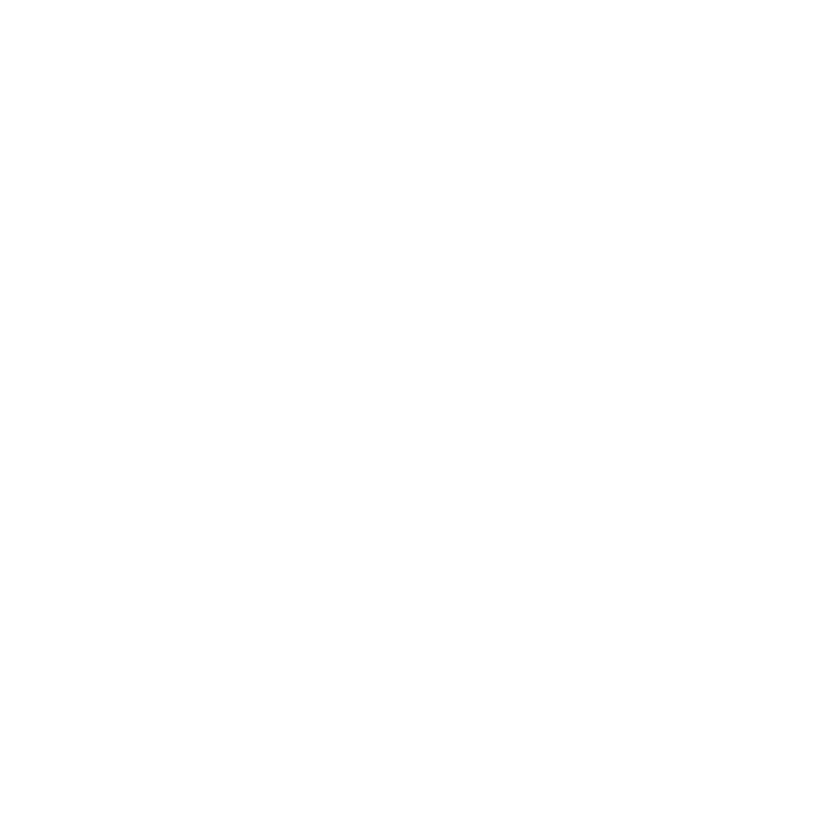

[1] " plot the 4 diagnostics plots for a linear model of Customer_rating vs.  Prior_purchases"


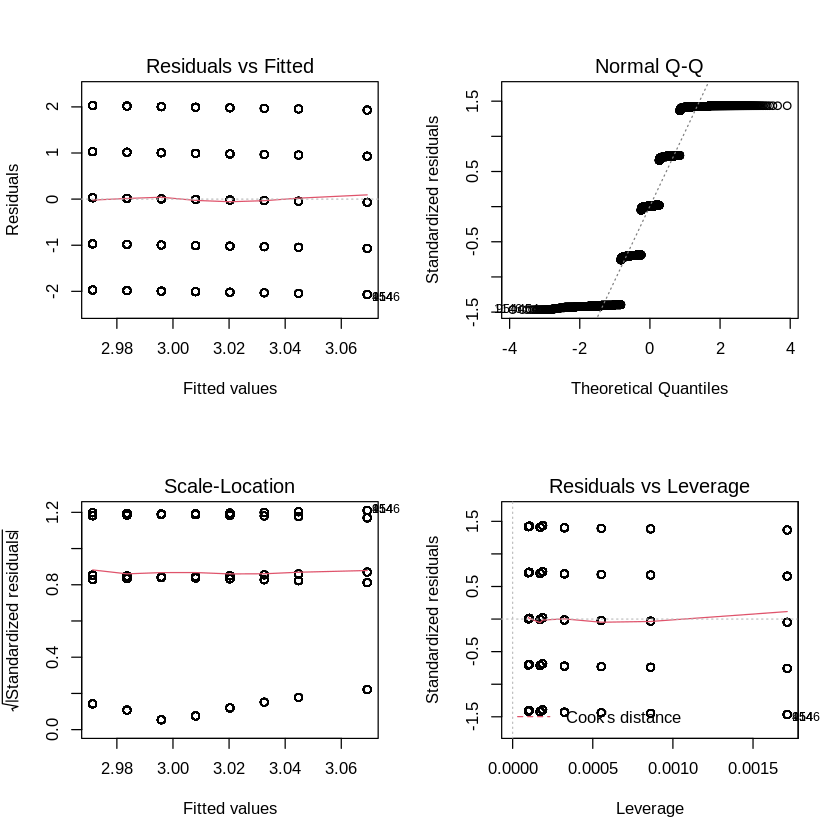

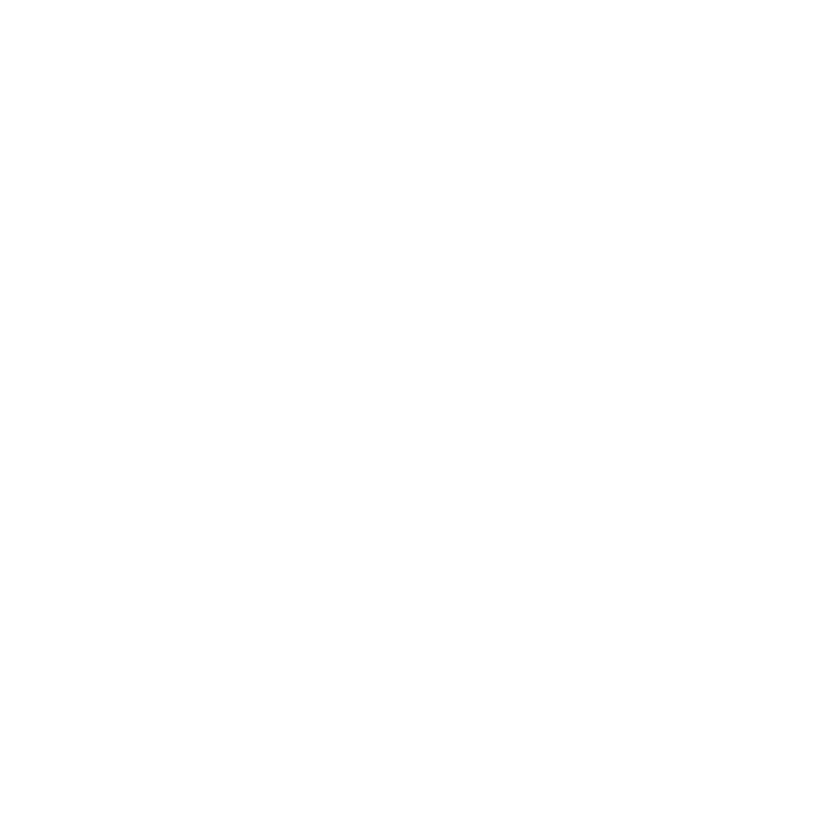

[1] " plot the 4 diagnostics plots for a linear model of Customer_rating vs.  Reached.on.Time_Y.N"


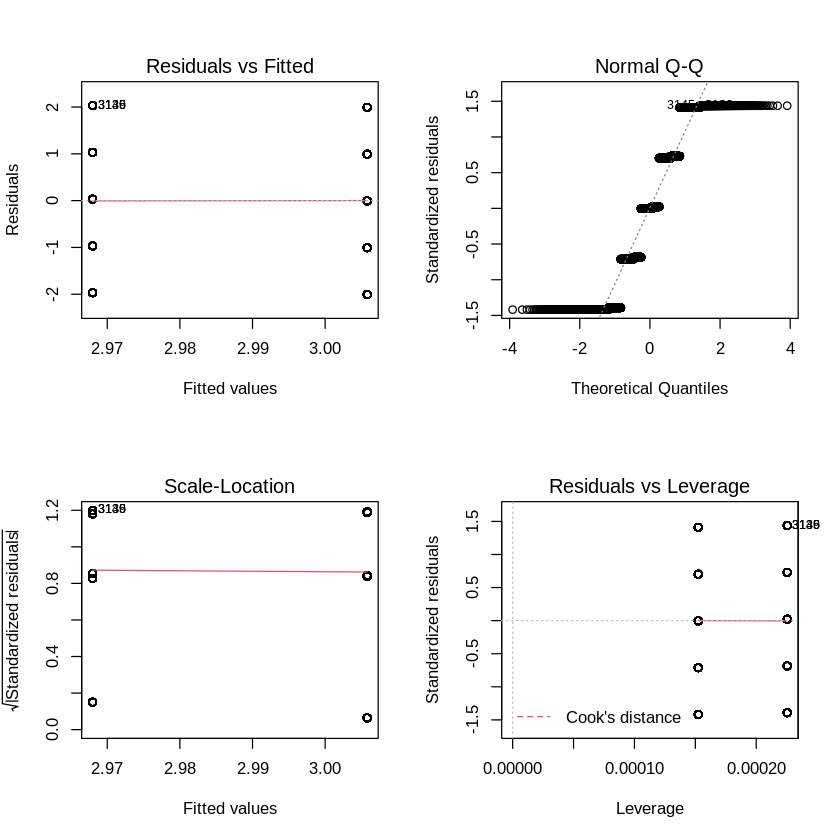

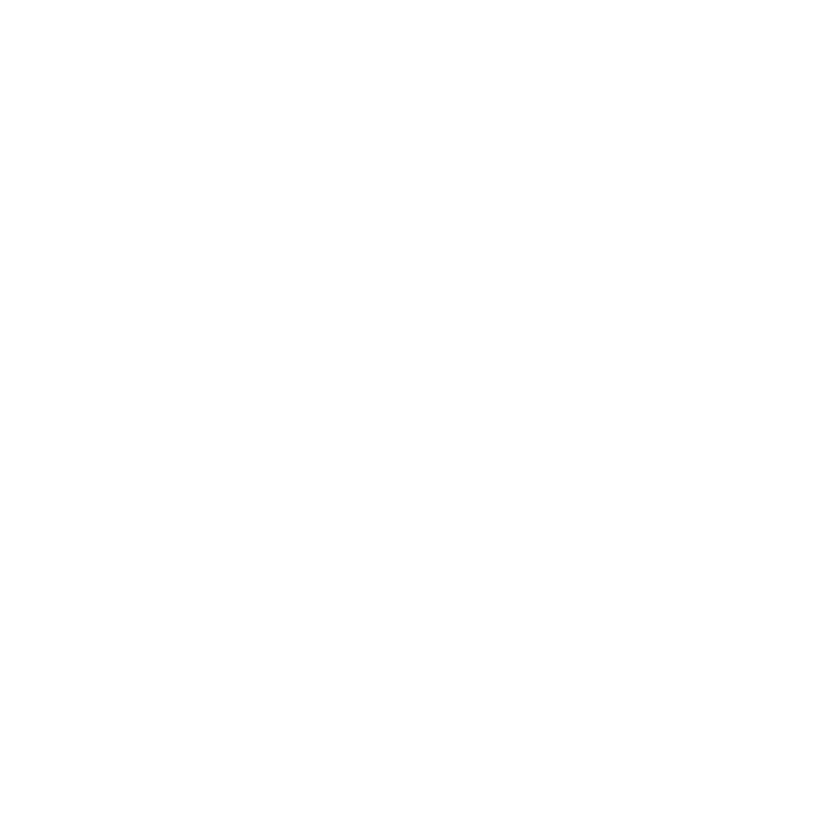

[1] " plot the 4 diagnostics plots for a linear model of Customer_rating vs.  Customer_care_calls"


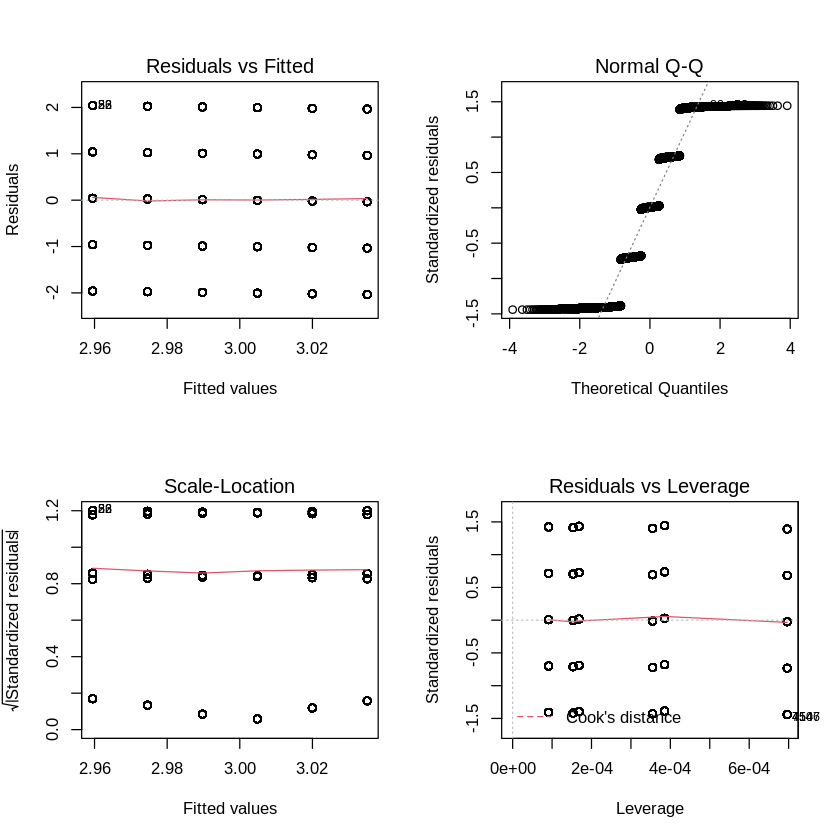

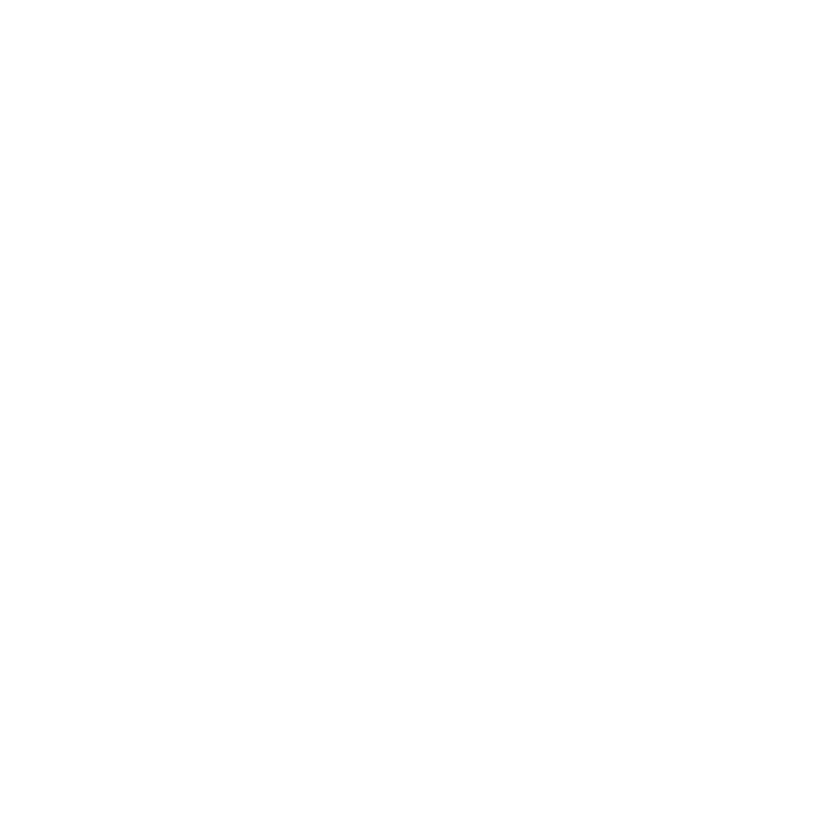

[1] " plot the 4 diagnostics plots for a linear model of Customer_rating vs.  Discount_offered"


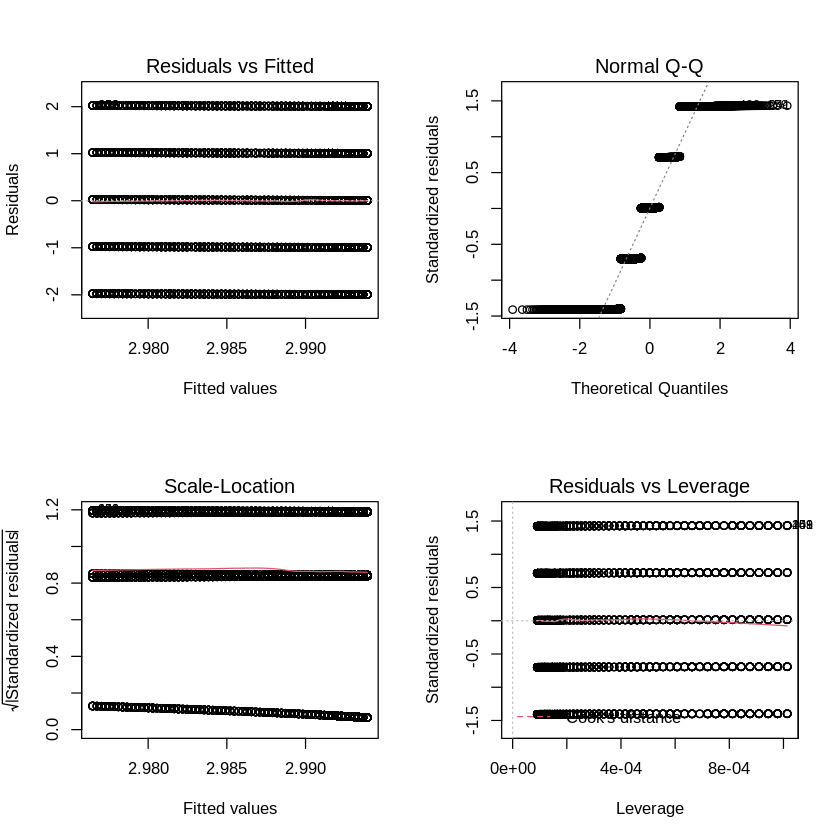

In [ ]:
#Running Diagnostic plots for each variables
cols = c("Cost_of_the_Product", "Prior_purchases","Reached.on.Time_Y.N","Customer_care_calls","Discount_offered")

for (i in 1:length(cols)){
  col <- cols[i]
  a.lm <- lm(paste("Customer_rating~", col), data = dataset)
  plot.new()
  par(mfrow = c(2, 2))  # Split the plotting panel into a 2 x 2 grid
  plot(a.lm)
  print(paste(" plot the 4 diagnostics plots for a linear model of Customer_rating vs. ",col))
}

In [18]:
if (!require(xray)) install.packages("xray")
library(xray)
xray::anomalies(dataset)


$variables
             Variable     q qNA pNA qZero  pZero qBlank pBlank qInf pInf
1 Reached.on.Time_Y.N 10999   0   -  4436 40.33%      0      -    0    -
2     Customer_rating 10999   0   -     0      -      0      -    0    -
3 Customer_care_calls 10999   0   -     0      -      0      -    0    -
4     Prior_purchases 10999   0   -     0      -      0      -    0    -
5    Discount_offered 10999   0   -     0      -      0      -    0    -
6 Cost_of_the_Product 10999   0   -     0      -      0      -    0    -
  qDistinct    type anomalous_percent
1         2 Integer            40.33%
2         5 Integer                 -
3         6 Integer                 -
4         8 Integer                 -
5        65 Integer                 -
6       215 Integer                 -

$problem_variables
 [1] Variable          q                 qNA               pNA              
 [5] qZero             pZero             qBlank            pBlank           
 [9] qInf              pInf              qDistinct         type             
[13] anomalous_percent problems         
<0 rows> (or 0-length row.names)

In [ ]:
#running VIF to check if any of the variables are correlated
packageurl<-"https://cran.r-project.org/src/contrib/Archive/nloptr/nloptr_1.2.1.tar.gz"
install.packages(packageurl, repos=NULL, type="source")
if (!require(car)) install.packages("car")
library(car)
vif(model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Cost_of_the_Product     Prior_purchases Reached.on.Time_Y.N Customer_care_calls 
           1.133396            1.042383            1.188395            1.150284 
   Discount_offered 
           1.214227

In [ ]:
model <- lm(Customer_rating~Cost_of_the_Product + Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls + Discount_offered, data=dataset)
summary(model)


Call:
lm(formula = Customer_rating ~ Cost_of_the_Product + Prior_purchases + 
    Reached.on.Time_Y.N + Customer_care_calls + Discount_offered, 
    data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10170 -1.01138  0.00672  1.03517  2.08480 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.8546820  0.0759543  37.584   <2e-16 ***
Cost_of_the_Product  0.0001575  0.0002986   0.528   0.5977    
Prior_purchases      0.0105126  0.0090365   1.163   0.2447    
Reached.on.Time_Y.N  0.0507920  0.0299513   1.696   0.0899 .  
Customer_care_calls  0.0107211  0.0126642   0.847   0.3973    
Discount_offered    -0.0006380  0.0009165  -0.696   0.4864    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.414 on 10993 degrees of freedom
Multiple R-squared:  0.0005587,	Adjusted R-squared:  0.0001041 
F-statistic: 1.229 on 5 and 10993 DF,  p-value: 0.2924


In [ ]:
model2 <- lm(Customer_rating~Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls + Discount_offered, data=dataset)
summary(model2)


Call:
lm(formula = Customer_rating ~ Prior_purchases + Reached.on.Time_Y.N + 
    Customer_care_calls + Discount_offered, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.11365 -1.01044  0.00631  1.03574  2.08040 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.8793404  0.0598758  48.089   <2e-16 ***
Prior_purchases      0.0108179  0.0090177   1.200   0.2303    
Reached.on.Time_Y.N  0.0505590  0.0299470   1.688   0.0914 .  
Customer_care_calls  0.0127082  0.0120910   1.051   0.2933    
Discount_offered    -0.0006792  0.0009132  -0.744   0.4570    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.413 on 10994 degrees of freedom
Multiple R-squared:  0.0005334,	Adjusted R-squared:  0.0001697 
F-statistic: 1.467 on 4 and 10994 DF,  p-value: 0.2094


In [ ]:
model3 <- lm(Customer_rating~Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls, data=dataset)
summary(model3)


Call:
lm(formula = Customer_rating ~ Prior_purchases + Reached.on.Time_Y.N + 
    Customer_care_calls, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.10558 -1.01057  0.01077  1.02785  2.07991 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.870543   0.058695  48.906   <2e-16 ***
Prior_purchases     0.011134   0.009007   1.236    0.216    
Reached.on.Time_Y.N 0.041850   0.027562   1.518    0.129    
Customer_care_calls 0.013641   0.012025   1.134    0.257    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.413 on 10995 degrees of freedom
Multiple R-squared:  0.0004831,	Adjusted R-squared:  0.0002104 
F-statistic: 1.771 on 3 and 10995 DF,  p-value: 0.1502


In [ ]:
model4 <- lm(Customer_rating~Prior_purchases + Reached.on.Time_Y.N, data=dataset)
summary(model4)


Call:
lm(formula = Customer_rating ~ Prior_purchases + Reached.on.Time_Y.N, 
    data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.08999 -0.99934  0.00184  1.02774  2.05364 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.920458   0.038845  75.182   <2e-16 ***
Prior_purchases     0.012950   0.008864   1.461    0.144    
Reached.on.Time_Y.N 0.040032   0.027516   1.455    0.146    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.413 on 10996 degrees of freedom
Multiple R-squared:  0.0003661,	Adjusted R-squared:  0.0001843 
F-statistic: 2.014 on 2 and 10996 DF,  p-value: 0.1335


In [ ]:
model5 <- lm(Customer_rating~Reached.on.Time_Y.N, data=dataset)
summary(model5)


Call:
lm(formula = Customer_rating ~ Reached.on.Time_Y.N, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.00579 -1.00579 -0.00579  1.03201  2.03201 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.96799    0.02122 139.845   <2e-16 ***
Reached.on.Time_Y.N  0.03780    0.02748   1.376    0.169    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.414 on 10997 degrees of freedom
Multiple R-squared:  0.0001721,	Adjusted R-squared:  8.118e-05 
F-statistic: 1.893 on 1 and 10997 DF,  p-value: 0.1689


In [ ]:
#preparing data
set.seed(123)
train_row <- sample(1:nrow(dataset), size = round(nrow(dataset)*0.7))
train_data <- dataset[train_row,]
validation_n_test_data <- dataset[-train_row,]
validation_row <- sample(1:nrow(validation_n_test_data),size=round(nrow(validation_n_test_data)*0.5))
validation_data <- dataset[validation_row,]
test_data <- dataset[-validation_row,]

train_data_with_tf <- train_data %>% 
  mutate(tf = ifelse(Customer_rating >= 4, 1, 0)) %>%
  select(tf, Cost_of_the_Product, Prior_purchases, Reached.on.Time_Y.N, Customer_care_calls, Discount_offered)

validation_data_with_tf <- validation_data %>% 
  mutate(tf = ifelse(Customer_rating >= 4, 1, 0))  %>%
  select(tf, Cost_of_the_Product, Prior_purchases, Reached.on.Time_Y.N, Customer_care_calls, Discount_offered)
  
test_data_with_tf <- test_data %>% 
  mutate(tf = ifelse(Customer_rating >= 4, 1, 0)) %>%
  select(tf, Cost_of_the_Product, Prior_purchases, Reached.on.Time_Y.N, Customer_care_calls, Discount_offered)

In [ ]:
logit_model = glm(tf~Cost_of_the_Product+Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls + Discount_offered,data=train_data_with_tf,family=binomial(link = "logit"))
summary(logit_model)
yhat<-predict(logit_model,validation_data,type = 'response')
yhat <- as.integer(yhat >= 0.5)
comp_table<-cbind(yhat,validation_data_with_tf$tf)
colnames(comp_table)[2]<-"tf"
comp_table<-as.data.frame(comp_table)

sum(comp_table$yhat ==  comp_table$tf) / nrow(comp_table)


logit_model = glm(tf~Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls + Discount_offered,data=train_data_with_tf,family=binomial(link = "logit"))
summary(logit_model)
yhat<-predict(logit_model,validation_data,type = 'response')
yhat <- as.integer(yhat >= 0.5)
comp_table<-cbind(yhat,validation_data_with_tf$tf)
colnames(comp_table)[2]<-"tf"
comp_table<-as.data.frame(comp_table)

sum(comp_table$yhat ==  comp_table$tf) / nrow(comp_table)


logit_model = glm(tf~Reached.on.Time_Y.N + Customer_care_calls + Discount_offered,data=train_data_with_tf,family=binomial(link = "logit"))
summary(logit_model)
yhat<-predict(logit_model,validation_data,type = 'response')
yhat <- as.integer(yhat >= 0.5)
comp_table<-cbind(yhat,validation_data_with_tf$tf)
colnames(comp_table)[2]<-"tf"
comp_table<-as.data.frame(comp_table)

sum(comp_table$yhat ==  comp_table$tf) / nrow(comp_table)


Call:
glm(formula = tf ~ Cost_of_the_Product + Prior_purchases + Reached.on.Time_Y.N + 
    Customer_care_calls + Discount_offered, family = binomial(link = "logit"), 
    data = train_data_with_tf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0638  -1.0091  -0.9888   1.3516   1.4097  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -6.479e-01  1.320e-01  -4.908 9.19e-07 ***
Cost_of_the_Product  2.291e-04  5.148e-04   0.445    0.656    
Prior_purchases      1.197e-02  1.551e-02   0.772    0.440    
Reached.on.Time_Y.N  3.497e-02  5.183e-02   0.675    0.500    
Customer_care_calls  2.998e-02  2.181e-02   1.375    0.169    
Discount_offered    -4.742e-05  1.585e-03  -0.030    0.976    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10349  on 7698  degrees of freedom
Residual deviance: 10344  on 7693  degrees of free

[1] 0.6181818


Call:
glm(formula = tf ~ Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls + 
    Discount_offered, family = binomial(link = "logit"), data = train_data_with_tf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0705  -1.0091  -0.9906   1.3510   1.4057  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.6114516  0.1035130  -5.907 3.48e-09 ***
Prior_purchases      0.0123214  0.0154889   0.795    0.426    
Reached.on.Time_Y.N  0.0346547  0.0518265   0.669    0.504    
Customer_care_calls  0.0328039  0.0208672   1.572    0.116    
Discount_offered    -0.0001118  0.0015785  -0.071    0.944    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10349  on 7698  degrees of freedom
Residual deviance: 10345  on 7694  degrees of freedom
AIC: 10355

Number of Fisher Scoring iterations: 4


[1] 0.6181818


Call:
glm(formula = tf ~ Reached.on.Time_Y.N + Customer_care_calls + 
    Discount_offered, family = binomial(link = "logit"), data = train_data_with_tf)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0551  -1.0118  -0.9943   1.3523   1.3994  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.5777974  0.0944408  -6.118 9.47e-10 ***
Reached.on.Time_Y.N  0.0335980  0.0518075   0.649   0.5167    
Customer_care_calls  0.0356703  0.0205565   1.735   0.0827 .  
Discount_offered    -0.0001605  0.0015773  -0.102   0.9190    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10349  on 7698  degrees of freedom
Residual deviance: 10345  on 7695  degrees of freedom
AIC: 10353

Number of Fisher Scoring iterations: 4


[1] 0.6181818

In [ ]:


# logit_model2 = glm(Customer_rating~Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls + Discount_offered,data=train_data,family=binomial(link = "logit"))
# summary(logit_model2)

# logit_model3 = glm(Customer_rating~Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls,data=train_data,family=binomial(link = "logit"))
# summary(logit_model3)

# logit_model4 = glm(Customer_rating~Prior_purchases + Reached.on.Time_Y.N,data=train_data,family=binomial(link = "logit"))
# summary(logit_model4)

# logit_model5 = glm(Customer_rating~Reached.on.Time_Y.N,data=train_data,family=binomial(link = "logit"))
# summary(logit_model5)

In [ ]:
#ksvm 
if (!require(kernlab)) install.packages("kernlab")
library(kernlab)
# amounts <- c(0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000) 
# acc <- rep(0, 9)
# acc
# for (i in 1:9) {
#      ksvm_model <- ksvm(tf~.,data=train_data_with_tf,,
# 		   type = "C-svc", # Use C-classification method
#               kernel = "vanilladot", # Use simple linear kernel
#               C = amounts[i],
# 		   scaled=TRUE) # have ksvm scale the data for you
#                pred <- predict(ksvm_model,validation_data)
#               #  print(pred)
#                acc[i] = sum(pred == validation_data_with_tf$tf) / nrow(validation_data)
# }

# acc[1:9]
# cat("Best SVM model is number ",which.max(acc[1:9]),"\n")
# cat("Best C value is ",amounts[which.max(acc[1:9])],"\n")
# cat("Best validation set correctness is ",max(acc[1:9]),"\n")


ksvm_model <- ksvm(tf~Cost_of_the_Product+Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls,data=train_data_with_tf,,
		   type = "C-svc", # Use C-classification method
              kernel = "vanilladot", # Use simple linear kernel
              C = 0.1,
		   scaled=TRUE) 

yhat <- predict(ksvm_model, newdata=validation_data_with_tf)
acc = sum(yhat == validation_data_with_tf$tf) / nrow(validation_data_with_tf)
acc


ksvm_model <- ksvm(tf~Cost_of_the_Product+Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls+Discount_offered,data=train_data_with_tf,,
		   type = "C-svc", # Use C-classification method
              kernel = "vanilladot", # Use simple linear kernel
              C = 0.1,
		   scaled=TRUE) 

yhat <- predict(ksvm_model, newdata=validation_data_with_tf)
acc = sum(yhat == validation_data_with_tf$tf) / nrow(validation_data_with_tf)
acc


ksvm_model <- ksvm(tf~Reached.on.Time_Y.N + Customer_care_calls+Discount_offered,data=train_data_with_tf,,
		   type = "C-svc", # Use C-classification method
              kernel = "vanilladot", # Use simple linear kernel
              C = 0.1,
		   scaled=TRUE) 

yhat <- predict(ksvm_model, newdata=validation_data_with_tf)
acc = sum(yhat == validation_data_with_tf$tf) / nrow(validation_data_with_tf)
acc

Loading required package: kernlab

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘kernlab’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 Setting default kernel parameters  


[1] 0.6181818

In [14]:
install.packages("randomForest")
library(randomForest)
randomforest_model <- randomForest(as.factor(tf)~Reached.on.Time_Y.N + Customer_care_calls+Discount_offered, data = train_data_with_tf, importance = TRUE)
randomforest_model

yhat <- predict(randomforest_model, newdata=validation_data_with_tf)
acc = sum(yhat == validation_data_with_tf$tf) / nrow(validation_data_with_tf)
acc


randomforest_model <- randomForest(as.factor(tf)~Cost_of_the_Product+Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls, data = train_data_with_tf, importance = TRUE)
randomforest_model

yhat <- predict(randomforest_model, newdata=validation_data_with_tf)
acc = sum(yhat == validation_data_with_tf$tf) / nrow(validation_data_with_tf)
acc


randomforest_model <- randomForest(as.factor(tf)~Cost_of_the_Product+Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls+Discount_offered, data = train_data_with_tf, importance = TRUE)
randomforest_model

yhat <- predict(randomforest_model, newdata=validation_data_with_tf)
acc = sum(yhat == validation_data_with_tf$tf) / nrow(validation_data_with_tf)
acc

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
 randomForest(formula = as.factor(tf) ~ Reached.on.Time_Y.N +      Customer_care_calls + Discount_offered, data = train_data_with_tf,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 39.77%
Confusion matrix:
     0 1 class.error
0 4637 0           0
1 3062 0           1

[1] 0.6181818


Call:
 randomForest(formula = as.factor(tf) ~ Cost_of_the_Product +      Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls,      data = train_data_with_tf, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 41.27%
Confusion matrix:
     0   1 class.error
0 4258 379  0.08173388
1 2798 264  0.91378184

[1] 0.6490909


Call:
 randomForest(formula = as.factor(tf) ~ Cost_of_the_Product +      Prior_purchases + Reached.on.Time_Y.N + Customer_care_calls +      Discount_offered, data = train_data_with_tf, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 42.37%
Confusion matrix:
     0   1 class.error
0 3964 673   0.1451369
1 2589 473   0.8455258

[1] 0.7848485

In [ ]:
#ksvm accuracy for test data
yhat <- predict(ksvm_model, newdata=test_data_with_tf)
ksvm_acc = sum(yhat == test_data_with_tf$tf) / nrow(test_data_with_tf)
ksvm_acc

[1] 0.5985667

In [ ]:
#ksvm predictors' importance for test data
if (!require(rminer)) install.packages("rminer")
library(rminer)
M <- fit(tf~., data=train_data_with_tf, model="svm", kpar=list(sigma=0.10), C=0.01)
svm.imp <- Importance(M=M, data=train_data_with_tf)
svm.imp
# tf	Cost_of_the_Product	Prior_purchases	Reached.on.Time_Y.N	Customer_care_calls	

Loading required package: rminer

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rminer’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future’, ‘future.apply’, ‘lava’, ‘prodlim’, ‘ipred’, ‘pROC’, ‘recipes’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘igraph’, ‘caret’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘reshape2’, ‘proxy’, ‘shape’, ‘plotrix’, ‘kknn’, ‘pls’, ‘mda’, ‘adabag’, ‘party’, ‘Cubist’, ‘e1071’, ‘glmnet’, ‘xgboost’




In [15]:
#random forest accuracy
yhat <- predict(randomforest_model, newdata=test_data_with_tf)
randomforest_acc = sum(yhat == test_data_with_tf$tf) / nrow(test_data_with_tf)
randomforest_acc

[1] 0.7482084

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Cost_of_the_Product,6.411662,-0.5501888,5.18455232,932.00932
Prior_purchases,3.304663,0.6634132,3.51920850,237.06685
Reached.on.Time_Y.N,-4.675559,3.3952147,-1.85027666,70.70822
Customer_care_calls,1.451091,4.9854569,4.87945587,186.12004
Discount_offered,-4.821932,6.1996349,0.06862703,538.63486


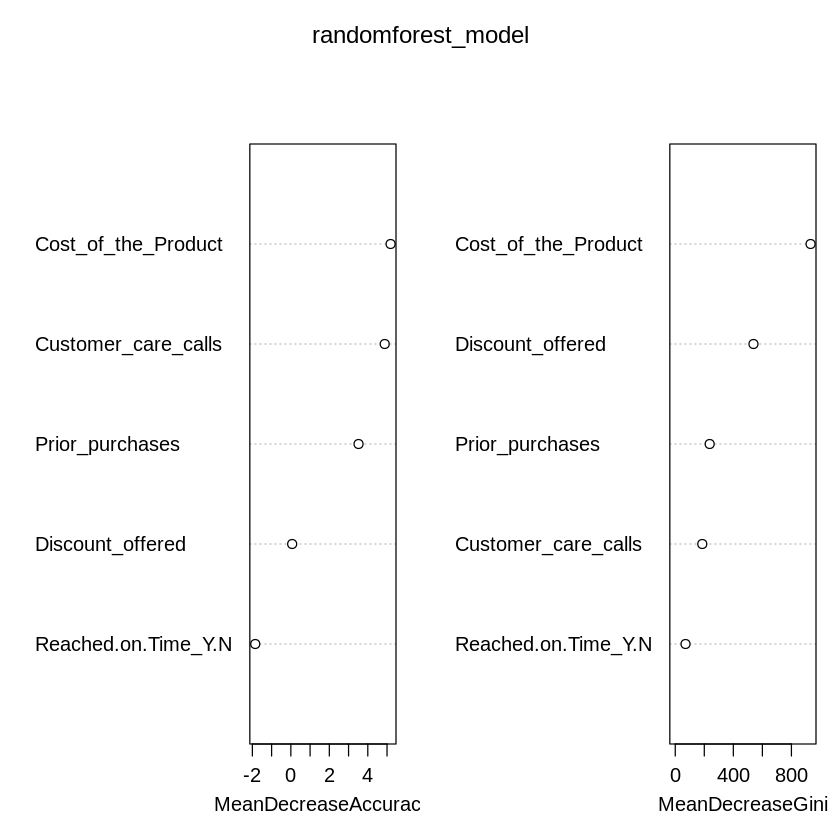

In [16]:
#random forest predictors' importance
importance(randomforest_model)
varImpPlot(randomforest_model)

# Second Dataset

## 1. Import and prepare dataset

###Load necessary packages

In [ ]:
#Load necessary packages
if (!require(xray)) install.packages("xray")
library(xray)
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)
if (!require(dplyr)) install.packages("dplyr")
library(dplyr)
if (!require(randomForest)) install.packages("randomForest")
library(randomForest)

Loading required package: xray

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘xray’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’


Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: randomForest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘randomForest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘p

###Import dataset

In [ ]:
getwd()

[1] "/content"

In [ ]:
data<-read.csv("/content/sample_data/Brazilian_data_cleaned.csv") 
head(data)

,review_id,order_id,customer_id,product_id,review_score,order_status,on_time_shipment,on_time_delivery,delivery_period,payment_sequential,⋯,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,is_reviewed
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,fd25ab760bfbba13c198fa3b4f1a0cd3,4,delivered,1,1,6,1,⋯,30,30,35,6030,osasco,SP,14600,sao joaquim da barra,SP,0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,8a2e7ef9053dea531e4dc76bd6d853e6,be0dbdc3d67d55727a65d4cd696ca73c,5,delivered,1,1,9,1,⋯,19,14,14,13380,nova odessa,SP,12233,sao jose dos campos,SP,0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,e226dfed6544df5b7b87a48208690feb,d1c427060a0f73f6b889a5c7c61f2ac4,5,delivered,1,1,13,1,⋯,20,20,20,44571,santo antonio de jesus,BA,37175,ilicinea,MG,0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,de6dff97e5f1ba84a3cd9a3bc97df5f6,52c80cedd4e90108bf4fa6a206ef6b03,5,delivered,1,1,11,1,⋯,20,20,20,88735,gravatal,SC,37175,ilicinea,MG,1
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5986b333ca0d44534a156a52a8e33a83,3880d25d502b15b1de6fddc42ad1d67a,5,delivered,0,1,18,1,⋯,105,35,50,89520,curitibanos,SC,81730,curitiba,PR,1
6,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,eecafc3ff695f031bfe354a9fff9d437,c45d02cc82cd779835094de9b29272cb,1,delivered,1,1,6,1,⋯,46,6,36,1536,sao paulo,SP,13405,piracicaba,SP,0


In [ ]:
#Exclude id columns, product names, zip code, sellers
data1<-data[,-c(1:4,16:29)]
str(data1)

'data.frame':	96352 obs. of  12 variables:
 $ review_score        : int  4 5 5 5 5 1 5 5 5 4 ...
 $ order_status        : chr  "delivered" "delivered" "delivered" "delivered" ...
 $ on_time_shipment    : int  1 1 1 1 0 1 1 1 1 1 ...
 $ on_time_delivery    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ delivery_period     : int  6 9 13 11 18 6 15 6 8 7 ...
 $ payment_sequential  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ payment_type        : chr  "credit_card" "credit_card" "credit_card" "credit_card" ...
 $ payment_value       : num  397.3 88.1 194.1 222.8 1333.2 ...
 $ payment_installments: int  8 1 1 1 10 1 2 3 3 8 ...
 $ price               : num  185 79.8 149 180 1199 ...
 $ freight_value       : num  13.6 8.3 45.1 42.9 134.2 ...
 $ is_reviewed         : int  0 0 0 1 1 0 0 0 0 1 ...


###Select predictors for analysis

In [ ]:
###1.3. Select variables - Stepwise regression
#intercept-only model
model_0<-lm(review_score~1,data=data1)
summary(model_0)



Call:
lm(formula = review_score ~ 1, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1555 -0.1555  0.8445  0.8445  0.8445 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.15554    0.00414    1004   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.285 on 96351 degrees of freedom


In [ ]:
#all-predictor model
model_all<-lm(review_score~.,data=data1)
summary(model_all)


Call:
lm(formula = review_score ~ ., data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2664 -0.5502  0.3832  0.7938 10.8879 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2.103e+00  4.698e-01   4.476 7.62e-06 ***
order_statusdelivered    1.487e+00  4.690e-01   3.170 0.001526 ** 
on_time_shipment         8.645e-02  1.324e-02   6.528 6.70e-11 ***
on_time_delivery         1.145e+00  1.704e-02  67.162  < 2e-16 ***
delivery_period         -2.406e-02  5.049e-04 -47.654  < 2e-16 ***
payment_sequential      -3.282e-02  1.824e-02  -1.799 0.071984 .  
payment_typecredit_card -3.834e-02  1.012e-02  -3.787 0.000153 ***
payment_typedebit_card   1.179e-02  3.097e-02   0.381 0.703392    
payment_typevoucher     -1.051e-01  2.775e-02  -3.786 0.000153 ***
payment_value           -1.152e-03  4.235e-05 -27.191  < 2e-16 ***
payment_installments    -4.089e-03  1.587e-03  -2.576 0.009986 ** 
price                    1.224e-03 

In [ ]:
#stepwise regression
both_ways <- step(model_0, direction='both', 
                  scope=formula(model_all), trace=0)
formula(both_ways)
summary(both_ways)

review_score ~ on_time_delivery + is_reviewed + delivery_period + 
    on_time_shipment + freight_value + payment_value + price + 
    payment_type + order_status + payment_installments + payment_sequential


Call:
lm(formula = review_score ~ on_time_delivery + is_reviewed + 
    delivery_period + on_time_shipment + freight_value + payment_value + 
    price + payment_type + order_status + payment_installments + 
    payment_sequential, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2664 -0.5502  0.3832  0.7938 10.8879 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2.103e+00  4.698e-01   4.476 7.62e-06 ***
on_time_delivery         1.145e+00  1.704e-02  67.162  < 2e-16 ***
is_reviewed             -5.121e-01  7.532e-03 -67.988  < 2e-16 ***
delivery_period         -2.406e-02  5.049e-04 -47.654  < 2e-16 ***
on_time_shipment         8.645e-02  1.324e-02   6.528 6.70e-11 ***
freight_value            2.788e-03  2.714e-04  10.273  < 2e-16 ***
payment_value           -1.152e-03  4.235e-05 -27.191  < 2e-16 ***
price                    1.224e-03  4.722e-05  25.918  < 2e-16 ***
payment_typecredit_card -3.834e-02  1.012

In [ ]:
#Add binary variable
data1$satisfied = ifelse(data1$review_score >= 4, 1, 0)
head(data1)

,review_score,order_status,on_time_shipment,on_time_delivery,delivery_period,payment_sequential,payment_type,payment_value,payment_installments,price,freight_value,is_reviewed,satisfied
,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,4,delivered,1,1,6,1,credit_card,397.26,8,185.00,13.63,0,1
2,5,delivered,1,1,9,1,credit_card,88.09,1,79.79,8.30,0,1
3,5,delivered,1,1,13,1,credit_card,194.12,1,149.00,45.12,0,1
4,5,delivered,1,1,11,1,credit_card,222.84,1,179.99,42.85,1,1
5,5,delivered,0,1,18,1,credit_card,1333.25,10,1199.00,134.25,1,1
6,1,delivered,1,1,6,1,credit_card,462.70,1,99.90,13.20,0,0


###Check missing values with xray package

In [ ]:
##Check missing values
xray::anomalies(data1)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


Variable,q,qNA,pNA,qZero,pZero,qBlank,pBlank,qInf,pInf,qDistinct,type,anomalous_percent
<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
is_reviewed,96352,0,-,55553,57.66%,0,-,0,-,2,Integer,57.66%
satisfied,96352,0,-,20311,21.08%,0,-,0,-,2,Numeric,21.08%
on_time_shipment,96352,0,-,8782,9.11%,0,-,0,-,2,Integer,9.11%
on_time_delivery,96352,0,-,7699,7.99%,0,-,0,-,2,Integer,7.99%
freight_value,96352,0,-,336,0.35%,0,-,0,-,6647,Numeric,0.35%
payment_installments,96352,0,-,2,0%,0,-,0,-,24,Integer,0%
order_status,96352,0,-,0,-,0,-,0,-,2,Character,-
payment_type,96352,0,-,0,-,0,-,0,-,4,Character,-
review_score,96352,0,-,0,-,0,-,0,-,5,Integer,-


##2. Exploratory Data Analysis

###Histogram of 'review_score' - response variable

Warning message:
“Use of `data1$review_score` is discouraged. Use `review_score` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



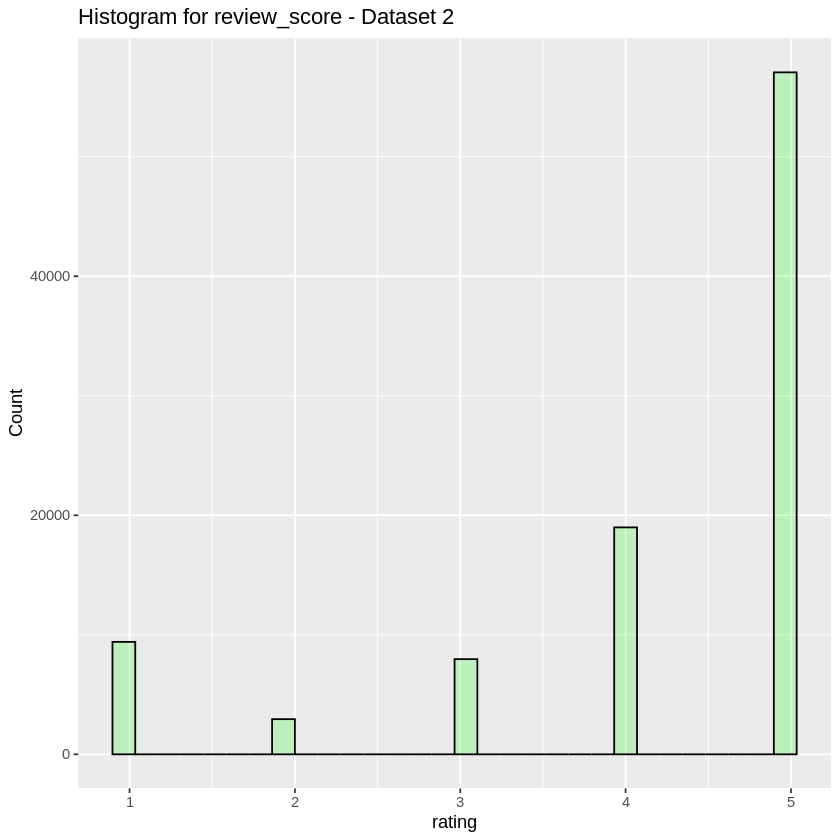

In [ ]:
##2.1. Histogram of response variable
ggplot(data=data1, aes(data1$review_score)) + 
  geom_histogram(col="black", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for review_score - Dataset 2") +
  labs(x="rating", y="Count")

###Explore and visualize relationship between predictors and 'review_score'

Loading required package: cowplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cowplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



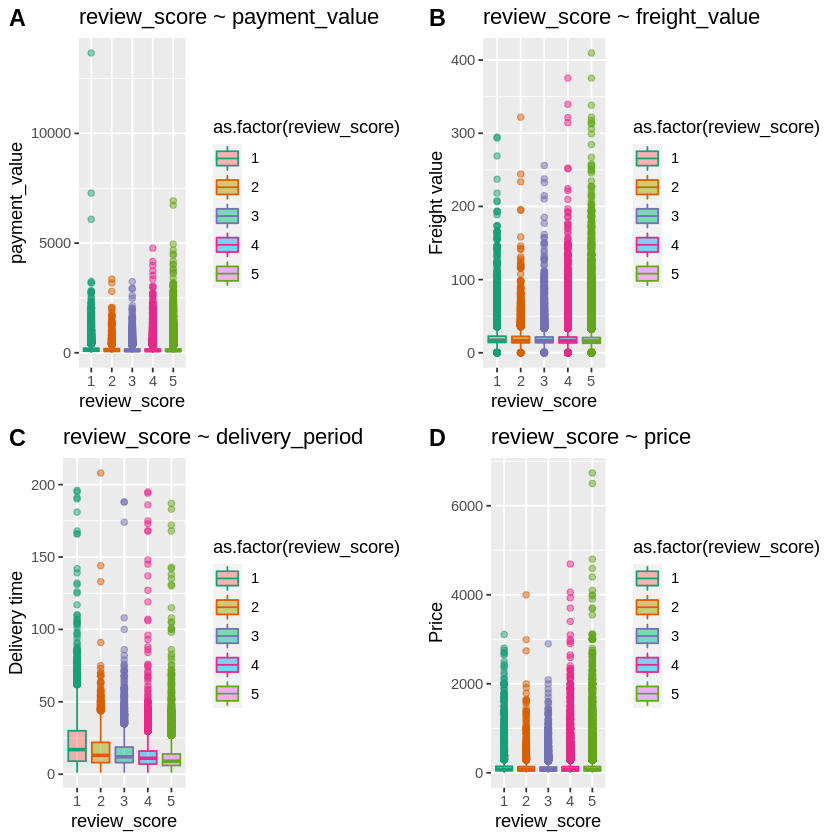

In [ ]:
if (!require(cowplot)) install.packages("cowplot")
library(cowplot)
##2.2. Explore and visualize relationship between predictors and 'review_score'
##Box plots
###Predictor 'payment_value': Does higher payment value have better review?
plot1<-ggplot(data = data1, aes(x=as.factor(review_score), y=payment_value,fill=as.factor(review_score),color=as.factor(review_score)))+ 
  geom_boxplot(alpha=0.5)+
  scale_color_brewer(palette="Dark2") +
  labs(title = 'review_score ~ payment_value',
       y='payment_value',x='review_score')
#>>>>>>No clear relationships found from the plot
###Predictor 'freight_value': Does higher freight_value usually have better review?
plot2<- ggplot(data = data1, aes(x=as.factor(review_score), y=freight_value,fill=as.factor(review_score),color=as.factor(review_score)))+ 
  geom_boxplot(alpha=0.5)+
  scale_color_brewer(palette="Dark2") +
  labs(title = 'review_score ~ freight_value',
       y='Freight value',x='review_score')
###Predictor 'delivery_period': Does shorter delivery time have better review?
plot3<-ggplot(data = data1, aes(x=as.factor(review_score), y=delivery_period,fill=as.factor(review_score),color=as.factor(review_score)))+ 
  geom_boxplot(alpha=0.5)+
  scale_color_brewer(palette="Dark2") +
  labs(title = 'review_score ~ delivery_period',
       y='Delivery time',x='review_score')
###Predictor 'price': Does shorter delivery time have better review?
plot4<-ggplot(data = data1, aes(x=as.factor(review_score), y=price,fill=as.factor(review_score),color=as.factor(review_score)))+ 
  geom_boxplot(alpha=0.5)+
  scale_color_brewer(palette="Dark2") +
  labs(title = 'review_score ~ price',
       y='Price',x='review_score')
plot_grid(plot1, plot2, plot3,plot4,labels="AUTO")


## 3. Modelling: Linear regression, Random Forest

In [ ]:
#3. Modelling: Split dataset 70:15:15 ratio
idx_train<-sample(1:nrow(data1),nrow(data1)*.7)
idx_nottrain<-which(! 1:nrow(data1) %in% idx_train )
idx_valid<-sample(idx_nottrain,as.integer(length(idx_nottrain)*.5))
idx_test<-idx_nottrain[which(!idx_nottrain%in% idx_valid)]
data_train<-data1[idx_train,]
data_valid<-data1[idx_valid,]
data_test<-data1[idx_test,]
y_train<-data_train[,1]
x_train<-data_train[,-1]
y_valid<-data_valid[,1]
x_valid<-data_valid[,-1]
y_test<-data_test[,1]
x_test<-data_test[,-1]

###  3.1. Linear regression

#### With all predictors

In [ ]:
##3.1. Linear regression
lr_model<-lm(review_score~.,data=data_train[,-13])
summary(lr_model)


Call:
lm(formula = review_score ~ ., data = data_train[, -13])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9914 -0.5470  0.3911  0.7959 10.0053 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.640e+00  5.154e-01   3.182 0.001461 ** 
order_statusdelivered    1.914e+00  5.142e-01   3.722 0.000198 ***
on_time_shipment         8.661e-02  1.584e-02   5.470 4.53e-08 ***
on_time_delivery         1.146e+00  2.043e-02  56.109  < 2e-16 ***
delivery_period         -2.373e-02  5.996e-04 -39.567  < 2e-16 ***
payment_sequential      -1.506e-02  2.165e-02  -0.696 0.486517    
payment_typecredit_card -3.420e-02  1.211e-02  -2.824 0.004747 ** 
payment_typedebit_card   1.644e-02  3.703e-02   0.444 0.656953    
payment_typevoucher     -1.159e-01  3.289e-02  -3.525 0.000423 ***
payment_value           -1.076e-03  4.743e-05 -22.687  < 2e-16 ***
payment_installments    -3.840e-03  1.896e-03  -2.025 0.042823 *  
price                  

R-squared = 19.76% and Adjusted R-squared = 19.78%.

#### With 8 most significant preditors

In [ ]:
lr_model2 <- lm(review_score~on_time_shipment+on_time_delivery+delivery_period+payment_type+payment_value+price+freight_value+is_reviewed, data = data_train[,-13])
summary(lr_model2)


Call:
lm(formula = review_score ~ on_time_shipment + on_time_delivery + 
    delivery_period + payment_type + payment_value + price + 
    freight_value + is_reviewed, data = data_train[, -13])

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9757 -0.5464  0.3908  0.7973 10.1042 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.539e+00  2.996e-02 118.124  < 2e-16 ***
on_time_shipment         8.809e-02  1.583e-02   5.564 2.64e-08 ***
on_time_delivery         1.145e+00  2.043e-02  56.036  < 2e-16 ***
delivery_period         -2.379e-02  5.992e-04 -39.704  < 2e-16 ***
payment_typecredit_card -4.384e-02  1.119e-02  -3.919 8.89e-05 ***
payment_typedebit_card   1.591e-02  3.703e-02   0.430    0.668    
payment_typevoucher     -1.277e-01  2.871e-02  -4.450 8.61e-06 ***
payment_value           -1.081e-03  4.717e-05 -22.923  < 2e-16 ***
price                    1.120e-03  5.399e-05  20.736  < 2e-16 ***
freight_value            2

R-squared = 19.76% and Adjusted R-squared = 19.74%

### 3.2. Logistic regression

#### With all predictors

In [ ]:
log_model = glm(satisfied~.,data=data_train[,-1],family='binomial')
summary(log_model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = satisfied ~ ., family = "binomial", data = data_train[, 
    -1])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8159   0.3947   0.4726   0.6802   4.2184  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -0.4696979  1.1717902  -0.401 0.688539    
order_statusdelivered    1.6768973  1.1693348   1.434 0.151555    
on_time_shipment         0.1840229  0.0334824   5.496 3.88e-08 ***
on_time_delivery         1.3369890  0.0401394  33.309  < 2e-16 ***
delivery_period         -0.0474614  0.0014834 -31.995  < 2e-16 ***
payment_sequential      -0.0662346  0.0510715  -1.297 0.194665    
payment_typecredit_card -0.0694013  0.0284890  -2.436 0.014848 *  
payment_typedebit_card  -0.0211907  0.0886999  -0.239 0.811181    
payment_typevoucher     -0.2680076  0.0748936  -3.579 0.000346 ***
payment_value           -0.0026339  0.0001406 -18.736  < 2e-16 ***
payment_installments    -0.0087145  0.0044306  

In [ ]:
if (!require(mice)) install.packages("base")
#library(mice)
options(warn=-1)

log_pred<-predict(log_model,data=data_valid[,-1],type = 'response')
log_pred <- as.integer(log_pred > 0.5)
comp_table<-cbind(log_pred,data_valid$satisfied)
colnames(comp_table)[2]<-"satisfied"
comp_table<-as.data.frame(comp_table)
log_acc<-sum(comp_table$log_pred ==  comp_table$satisfied) / nrow(comp_table)
cat('Accuracy of prediction with all predictors is: ',round(rf_acc,4)*100,'%')


Loading required package: mice

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mice’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘base’ is a base package, and should not be updated”


Accuracy of prediction with all predictors is:  81.57 %

### 3.2. Random forest

In [ ]:
if (!require(randomForest)) install.packages("randomForest")
library(randomForest)

#### With all predictors

In [ ]:
#With all predictors
rf_model <- randomForest(as.factor(satisfied)~., data = data_train[,-1], importance = TRUE)
rf_model


Call:
 randomForest(formula = as.factor(satisfied) ~ ., data = data_train[,      -1], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.61%
Confusion matrix:
     0     1 class.error
0 3637 10554  0.74371080
1 1321 51934  0.02480518


Call:
 randomForest(formula = as.factor(satisfied) ~ ., data = data_train[,      -1], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.61%
Confusion matrix:
     0     1 class.error
0 3637 10554  0.74371080
1 1321 51934  0.02480518


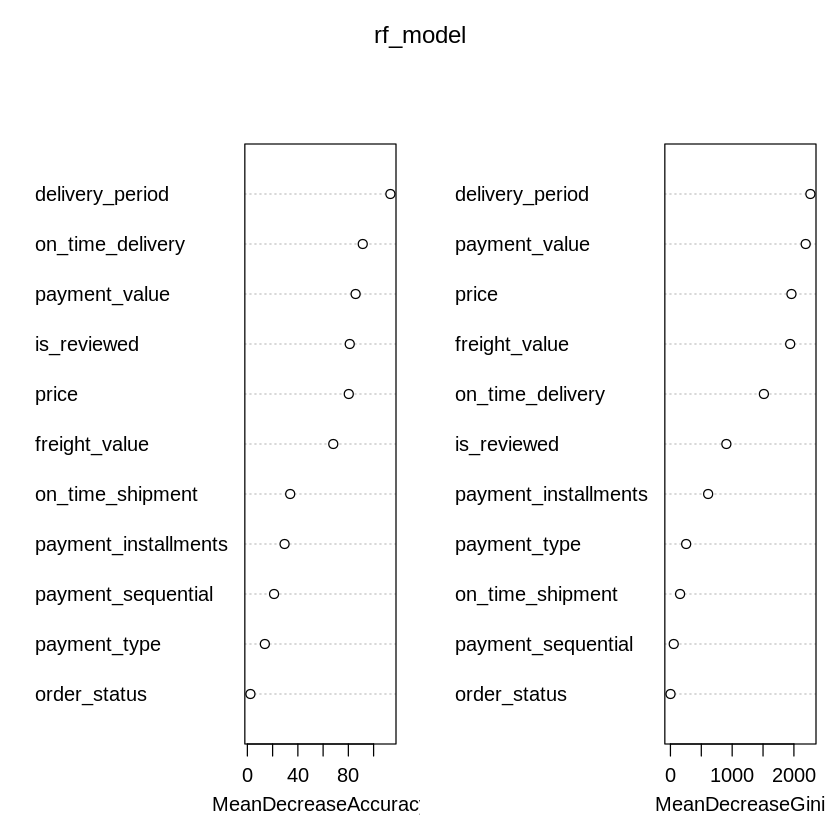

In [ ]:
print(rf_model)
varImpPlot(rf_model)

In [ ]:
rf_pred <- predict(rf_model, newdata=data_valid[,-1])
rf_acc = sum(rf_pred == data_valid$satisfied) / nrow(data_valid)
cat('Accuracy of prediction with all predictors is: ',round(rf_acc,4)*100,'%')

Accuracy of prediction with all predictors is:  81.57 %

#### With most statistically significant predicitors

In [ ]:
rf_model2 <- randomForest(as.factor(satisfied)~on_time_shipment+on_time_delivery+delivery_period+payment_type+payment_value+price+freight_value+is_reviewed, data = data_train[,-1], importance = TRUE)
rf_model2


Call:
 randomForest(formula = as.factor(satisfied) ~ on_time_shipment +      on_time_delivery + delivery_period + payment_type + payment_value +      price + freight_value + is_reviewed, data = data_train[,      -1], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 17.66%
Confusion matrix:
     0     1 class.error
0 3429 10762  0.75836798
1 1146 52109  0.02151911


Call:
 randomForest(formula = as.factor(satisfied) ~ on_time_shipment +      on_time_delivery + delivery_period + payment_type + payment_value +      price + freight_value + is_reviewed, data = data_train[,      -1], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 17.66%
Confusion matrix:
     0     1 class.error
0 3429 10762  0.75836798
1 1146 52109  0.02151911


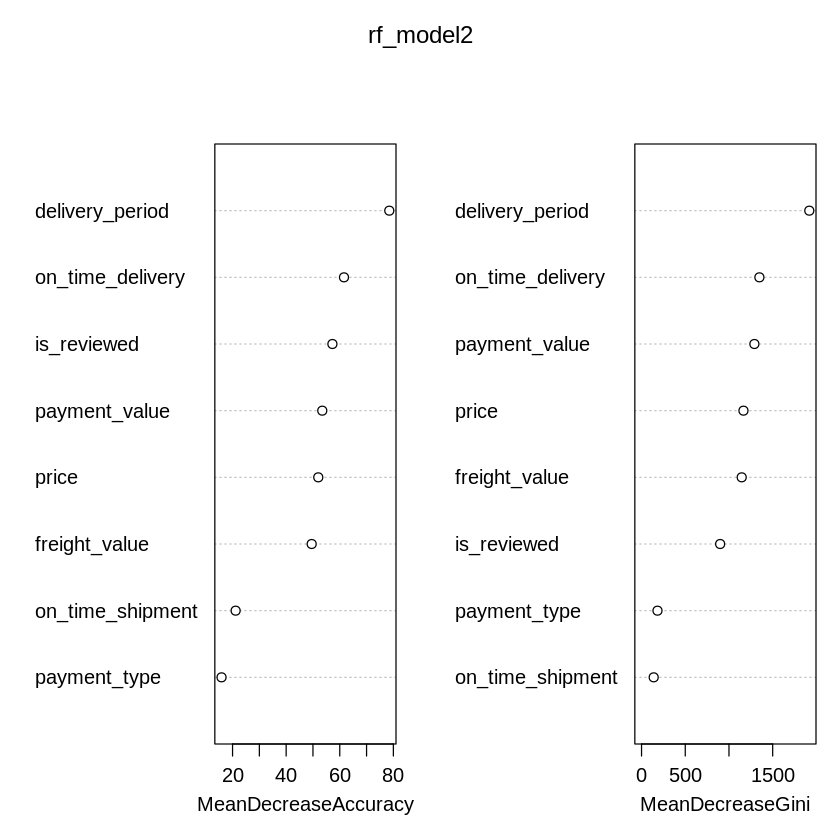

In [ ]:
print(rf_model2)
varImpPlot(rf_model2)

In [ ]:
rf_pred2 <- predict(rf_model2, newdata=data_valid[,-1])
rf_acc2 = sum(rf_pred2 == data_valid$satisfied) / nrow(data_valid)
cat('Accuracy of prediction with 8 predictors is: ',round(rf_acc2,4)*100,'%')

Accuracy of prediction with 8 predictors is:  81.61 %

## 4. Test models using test data

### 4.1. Linear regression

In [ ]:
lr_pred_test<-predict(lr_model,newdata=data_test)
lr_acc_test = sum(round(lr_pred_test) == data_test$review_score) / nrow(data_test)
cat('Accuracy of prediction with 8 predictors for review_score is: ',round(lr_acc_test,4)*100,'%')

Accuracy of prediction with 8 predictors for review_score is:  35 %

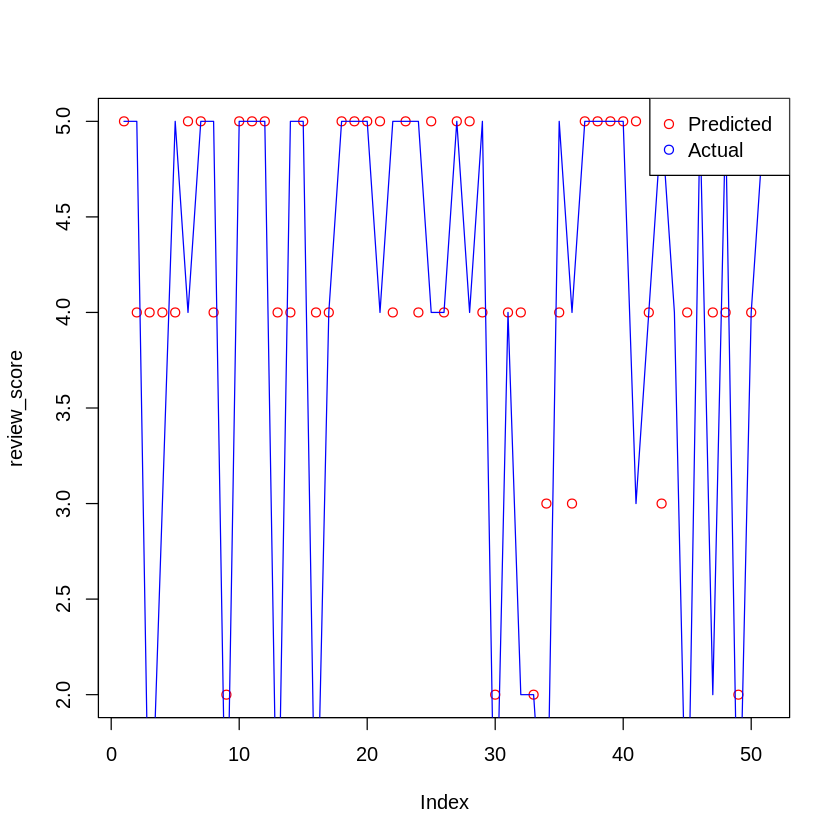

In [ ]:
plot<-data.frame(Predict = round(lr_pred_test), Actual = y_test)
for_plot<-plot[50:100,]
plot(for_plot$Pred,col = "red", ylab = "review_score")
lines(for_plot$Actual, col = "blue")
legend("topright", legend = c("Predicted","Actual"), col=c("red","blue"), pch=1)

### 4.2. Logistic regression

In [ ]:
log_pred_test <- predict(log_model, data_test[,-1],type = 'response')
log_pred_test <- as.integer(log_pred_test > 0.5)
log_acc_test = sum(log_pred_test == data_test$satisfied) / nrow(data_test)
cat('Accuracy of prediction of logistic model with satisfied binary response variable is: ',round(log_acc_test,4)*100,'%')

Accuracy of prediction of logistic model with satisfied binary response variable is:  82.16 %

### 4.2. Random forest

In [ ]:
rf_pred2_test <- predict(rf_model2, newdata=data_test[,-1])
rf_acc2_test = sum(rf_pred2_test == data_test$satisfied) / nrow(data_test)
cat('Accuracy of prediction of random forest with 8 predictors with satisfied binary response variable is: ',round(rf_acc2_test,4)*100,'%')

Accuracy of prediction of random forest with 8 predictors with satisfied binary response variable is:  82.34 %

# Third Dataset

### 5.1 Marketing Funnel Data Analysis - Saurav

In [ ]:
# To shut off warnings
options(warn=-1)
# Loading libraries
if (!require(tictoc)) install.packages("tictoc")
if (!require(glue)) install.packages("glue")
sh <- suppressPackageStartupMessages
sh(library('tictoc'))
sh(library("glue"))
sh(library('dplyr'))

In [ ]:
# Having a static random seed so that we get the same results for the whole script everytime
set.seed(42)
tic("Data loading")
qualified_leads_df <- read.csv("/content/olist/olist_marketing_qualified_leads_dataset.csv", header=TRUE)
print(glue("The first five rows of data are as follows"))
head(qualified_leads_df, n=5)
toc()
print(glue("Shape of dataset is {nrow(qualified_leads_df)} rows and {ncol(qualified_leads_df)} columns"))
summary(qualified_leads_df)

The first five rows of data are as follows


,mql_id,first_contact_date,landing_page_id,origin
,<chr>,<chr>,<chr>,<chr>
1,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
2,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
3,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
4,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
5,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


Data loading: 0.046 sec elapsed
Shape of dataset is 8000 rows and 4 columns


    mql_id          first_contact_date landing_page_id       origin         
 Length:8000        Length:8000        Length:8000        Length:8000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

In [ ]:
tic("Data loading")
closed_deals_df <- read.csv("/content/olist/olist_closed_deals_dataset.csv", header=TRUE)
print(glue("The first five rows of data are as follows"))
head(closed_deals_df, n=5)
toc()
print(glue("Shape of dataset is {nrow(closed_deals_df)} rows and {ncol(closed_deals_df)} columns"))
summary(closed_deals_df)

The first five rows of data are as follows


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,,,,reseller,NA,0
2,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,,,,reseller,NA,0
3,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,,,,reseller,NA,0
4,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,,,,,reseller,NA,0
5,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,,,,manufacturer,NA,0


Data loading: 0.035 sec elapsed
Shape of dataset is 842 rows and 14 columns


    mql_id           seller_id            sdr_id             sr_id          
 Length:842         Length:842         Length:842         Length:842        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   won_date         business_segment    lead_type        
 Length:842         Length:842         Length:842        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                    

In [ ]:
sorted_leadtypes = closed_deals_df %>% group_by(lead_type) %>% summarise(Count = n()) %>% arrange(desc(Count))
sorted_leadtypes

lead_type,Count
<chr>,<int>
online_medium,332
online_big,126
industry,123
offline,104
online_small,77
online_beginner,57
online_top,14
,6
other,3


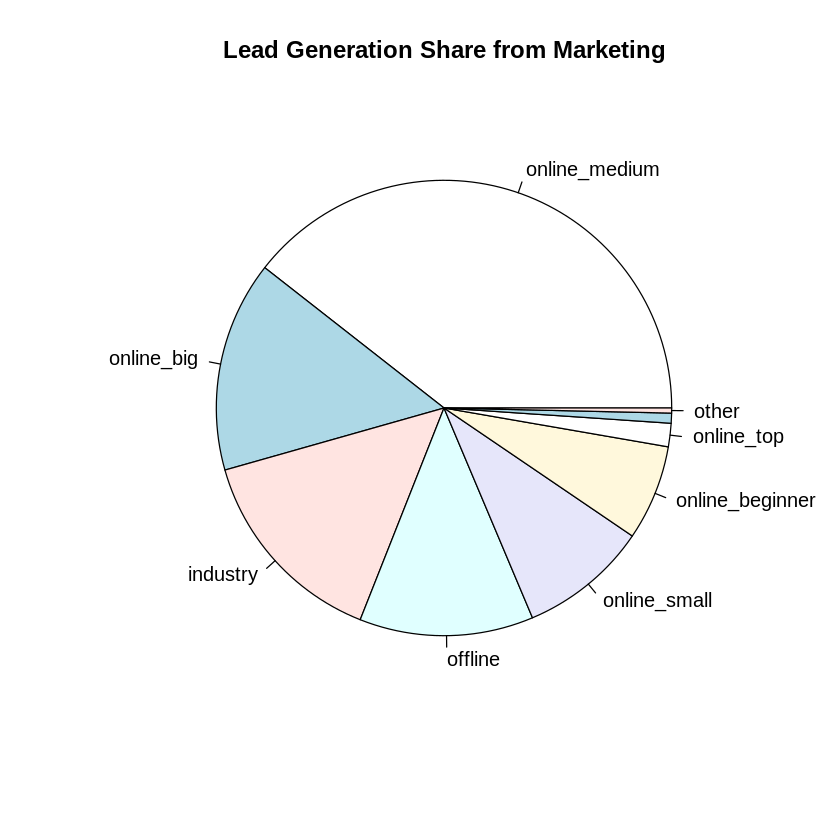

In [ ]:
pie(sorted_leadtypes$Count, sorted_leadtypes$lead_type, main='Lead Generation Share from Marketing')

##### Clearly online medium is the clear winner and more marketing funds should be denoted towards that.

In [ ]:
sorted_businesstypes = closed_deals_df %>% group_by(business_type) %>% summarise(Count = n()) %>% arrange(desc(Count))
sorted_businesstypes

business_type,Count
<chr>,<int>
reseller,587
manufacturer,242
,10
other,3


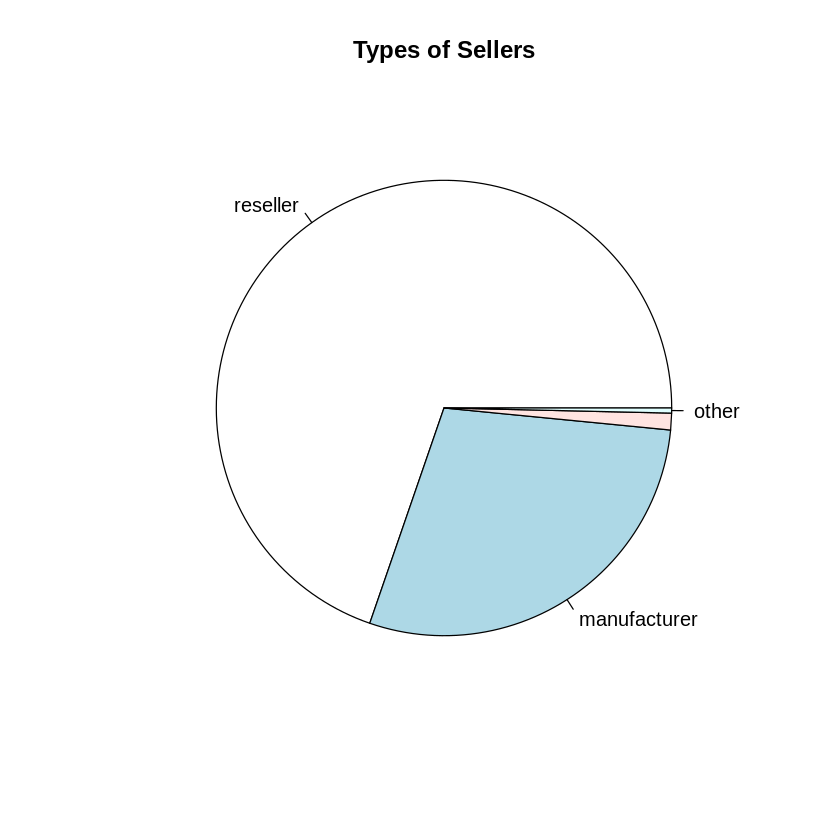

In [ ]:
pie(sorted_businesstypes$Count, sorted_businesstypes$business_type, main='Types of Sellers')

##### We see that the majority percentage is mostly resellers. More marketing should be directed towards manufacturers - plans of direct partnership with manufacturers for higher profit margins.

In [ ]:
sorted_origins = qualified_leads_df %>% group_by(origin) %>% summarise(Count = n()) %>% arrange(desc(Count))
sorted_origins

origin,Count
<chr>,<int>
organic_search,2296
paid_search,1586
social,1350
unknown,1099
direct_traffic,499
email,493
referral,284
other,150
display,118


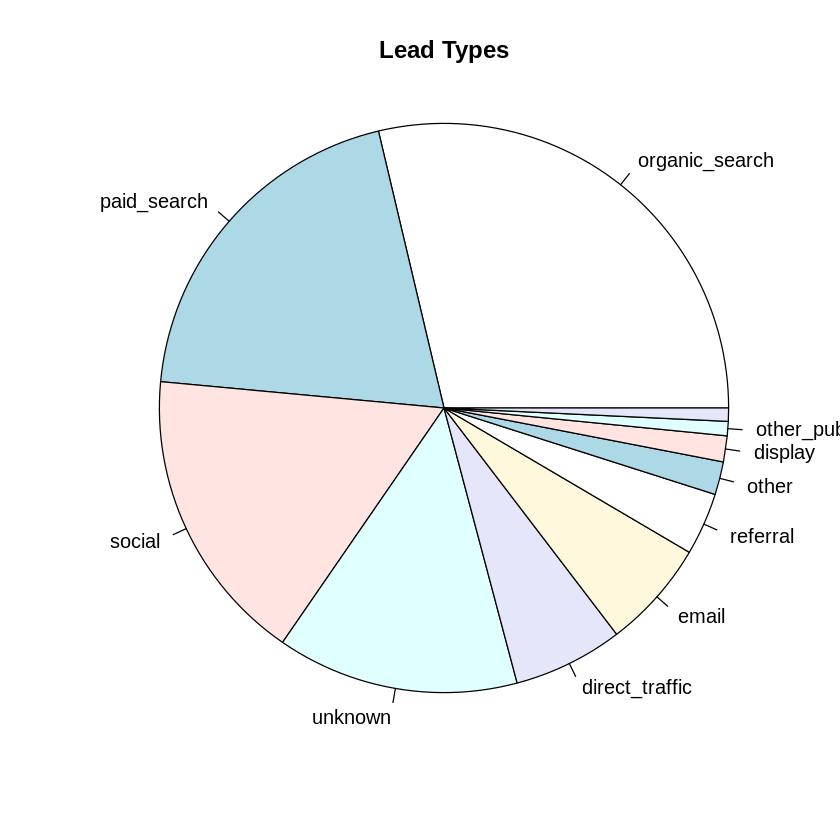

In [ ]:
pie(sorted_origins$Count, sorted_origins$origin, main='Lead Types', radius=1)

##### A lot of the leads are generated by organic search, which means there is a enuine demand for sellers to sell on the website. One interesting observation is referral is quite low. This might be a insight into psychology that sellers do not want competetion, thus they are hesitant to refer other sellers to the website. A better referral program which has more incentive might be put out to bring in more leads through the referral channel. We also see a big chunk to unknown, we need to track the leads better. Furthermore, we should spend more budget on paid searches and social media because they are the highest performers, instead of channels like display or emails.

### 5.2 Marketing Funnel Data Analysis - Dan

In [ ]:
options(warn=-1)
sh <- suppressPackageStartupMessages
#Import libraries
install.packages("caret")
sh(library(tidyverse))
#library(glmnet)
#sh(library(caret))
sh(library(dplyr))
#sh(library(VIM))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘future’, ‘future.apply’, ‘lava’, ‘prodlim’, ‘ipred’, ‘ModelMetrics’, ‘recipes’




In [ ]:
# Load Olist Marketing funnel datasets
leads <-read.csv("/content/olist_marketing_qualified_leads_dataset.csv" )
closed <-read.csv("/content/olist_closed_deals_dataset.csv")

# Merge Marketing funnel datasets into one
mkt_data <- merge(leads, closed,by="mql_id")

# Getting an idea of total number of unique sellers listed in these datasets
length(unique(mkt_data$seller_id))
dim(mkt_data)
head(mkt_data)

# Load Olist Order and Sales datasets
geolocations <- read_csv("/content/olist_geolocation_dataset.csv")
customers <- read_csv("/content/olist_customers_dataset.csv")
items <- read_csv("/content/olist_order_items_dataset.csv")
reviews <- read_csv("/content/olist_order_reviews_dataset.csv")
products <- read_csv("/content/olist_products_dataset.csv")
sellers <- read_csv("/content/olist_sellers_dataset.csv")
payments <- read_csv("/content/olist_order_payments_dataset.csv")
orders <- read_csv("/content/olist_orders_dataset.csv")



[1] 842

[1] 842  17

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,000dd3543ac84d906eae52e7c779bb2a,2018-04-05,b48ec5f3b04e9068441002a19df93c6c,organic_search,500b5e25308adf85bbc0bbc52c3dc05b,a8387c01a09e99ce014107505b92388c,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-24 03:00:00,home_decor,industry,cat,,,,manufacturer,NA,0
2,009ff90f082aaa9fcd6e14caf65c7cc6,2018-03-19,4aab772aeb9833c170d8ea5413e02eac,paid_search,134285d1f41da5c13a756ee8142c8a4e,a8387c01a09e99ce014107505b92388c,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-03 03:00:00,car_accessories,online_big,cat,,,,reseller,NA,0
3,00dc5000951c268cc8655294daf67b1b,2018-03-26,282cb66cf00adbf96a4486eb4cb2431c,paid_search,00065220becb8785e2cf78355eb9bf68,9d12ef1a7eca3ec58c545c678af7869c,de63de0d10a6012430098db33c679b0b,2018-07-10 11:34:50,handcrafted,online_medium,cat,False,False,20-50,reseller,NA,0
4,010ed37e44e2fdc175b4c5c6c930805a,2018-03-06,b6885f18d203a61176418c1fb3764815,paid_search,8c6d188ef073e289887bc52bc37f3e61,068066e24f0c643eb1d089c7dd20cd73,9749123c950bf8363ace42cb1c2d0815,2018-09-14 14:43:50,audio_video_electronics,online_medium,cat,True,True,5-20,reseller,70,250000
5,012fa44d6752ee07c167165cb8c6f11c,2018-03-07,22c29808c4f815213303f8933030604c,unknown,528e4514f9339c1c3dd7535fd1a2d8cb,9e4d1098a3b0f5da39b0bc48f9876645,4ef15afb4b2723d8f3d81e51ec7afefe,2018-03-08 15:01:48,home_decor,online_small,wolf,,,,manufacturer,NA,0
6,01409f7f7f2bd5ec0c1755b362e9db6e,2018-01-30,21a104c3279681d9856b8a48723c4fee,other_publicities,eada4a0629faf243de4159916c10cd1a,fdb16d3cbbeb5798f2f66c4096be026d,2695de1affa7750089c0455f8ce27021,2018-03-06 18:14:08,health_beauty,online_big,cat,,,,reseller,NA,0


Rows: 1000163 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): geolocation_zip_code_prefix, geolocation_city, geolocation_state
dbl (2): geolocation_lat, geolocation_lng

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 99441 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): customer_id, customer_unique_id, customer_zip_code_prefix, customer...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 112650 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): order_id, product_id, seller_id
dbl  (3): order_item_id, price, freight_value
dttm (1): shipping_limit_date

ℹ Use `spec()` 

### This dataset only contains information about 842 sellers.

In [ ]:
# Merging all the Olist order and sales datasets into one df
# https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
temp <-orders %>%
     left_join(payments) %>%
     left_join(items) %>%
     #left_join(distinct(select(items, order_id, seller_id))) %>%
     left_join(customers) %>%
     left_join(distinct(select(reviews, order_id))) %>%
     left_join(sellers) %>%
     distinct(order_id, .keep_all = TRUE) %>%
     group_by(order_id)

dim(temp)

# Adding in the marketing data sets found here that were already prepared in code cell code above:
# https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist
temp2 <- temp %>%
    left_join(mkt_data) %>%
    distinct(seller_id, .keep_all = TRUE) %>%
    # Dropping all rows with NA values that will not be useful for our analysis
    # These represent orders fulfilled by sellers that don't have a match in the Marketing Funnel dataset
    filter(!is.na(mql_id)) %>%
    group_by(seller_id)

dim(temp2)
# Adjust IPython display options to show more columns
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)

head(temp2)

#summary(temp2)
sapply(temp2, function(x) sum(is.na(x)))

Joining, by = "order_id"
Joining, by = "order_id"
Joining, by = "customer_id"
Joining, by = "order_id"
Joining, by = "seller_id"


[1] 99441    25

Joining, by = "seller_id"


[1] 4466   41

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,mql_id,first_contact_date,landing_page_id,origin,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18,1,boleto,1,50.13,1,72a97c271b2e429974398f46b93ae530,094ced053e257ae8cae57205592d6712,2018-06-18 03:13:12,31.90,18.23,e97109680b052ee858d93a539597bba7,35400,ouro preto,MG,14095,ribeirao preto,SP,62a081b993506561f522af260073cb18,2018-03-02,4e24f6443807ad2eba56754b0dc91140,direct_traffic,9e4d1098a3b0f5da39b0bc48f9876645,4ef15afb4b2723d8f3d81e51ec7afefe,2018-03-13 12:33:10,health_beauty,online_medium,cat,,,,reseller,NA,0
dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1,credit_card,10,146.45,1,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.40,14.05,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,71931,brasilia,DF,7c3e1a45e4127c0eb25d7a8b7250da5b,2017-08-30,fbc24da54d531c6204ae2d17b1090bb1,paid_search,068066e24f0c643eb1d089c7dd20cd73,060c0a26f19f4d66b42e0d8796688490,2018-04-10 19:17:03,health_beauty,online_small,,,,,reseller,NA,0
f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1,boleto,1,104.11,1,e99d69efe684efaa643f99805f7c81bc,55c26bcb609f480eb7868594245febb5,2018-08-14 03:24:51,89.90,14.21,9c9242ad7f1b52d926ea76778e1c0c57,18052,sorocaba,SP,14910,tabatinga,SP,f74b25a7dc1504cf5a3b964a990266ff,2018-01-19,b76ef37428e6799c421989521c0e5077,organic_search,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-03-01 14:58:45,baby,online_big,cat,,,,reseller,NA,0
91b2a010e1e45e6ba3d133fa997597be,cce89a605105b148387c52e286ac8335,delivered,2018-05-02 11:45:38,2018-05-03 12:55:01,2018-05-10 16:16:00,2018-05-16 20:56:24,2018-05-23,1,credit_card,8,192.68,1,ba74c6b75d2ad7503175809688d5a03c,7d13fca15225358621be4086e1eb0964,2018-05-09 12:55:01,178.99,13.69,bd13608b9c6033892ce62269b50a0afc,09182,santo andre,SP,14050,ribeirao preto,SP,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,,,,,reseller,NA,0
d22e9fa5731b9e30e8b27afcdc2f8563,756fb9391752dad934e0fe3733378e57,delivered,2018-08-04 23:25:30,2018-08-04 23:35:13,2018-08-06 15:03:00,2018-08-13 23:34:42,2018-09-13,1,debit_card,1,121.62,1,f410090aec61f7c73748ca894286edcd,980640c45d7a4635885491d077167e4d,2018-08-07 23:35:13,99.00,22.62,394b2ce444baae9ae609f5d32000de0f,47850,luis eduardo magalhaes,BA,13501,rio claro,SP,68482ad368c7b9779cf50a7164815379,2018-05-22,b76ef37428e6799c421989521c0e5077,unknown,4b339f9567d060bcea4f5136b9f5949e,de63de0d10a6012430098db33c679b0b,2018-05-24 20:25:11,bags_backpacks,online_medium,cat,,,,reseller,NA,0
47aa4816b27ba60ec948cd019cc1afc1,148348ff65384b4249b762579532e248,delivered,2018-06-26 13:42:52,2018-06-27 08:35:32,2018-06-27 13:20:00,2018-07-03 18:37:46,2018-07-20,1,boleto,1,71.91,1

order_id                   customer_id 
                            0                             0 
                 order_status      order_purchase_timestamp 
                            0                             0 
            order_approved_at  order_delivered_carrier_date 
                            0                            14 
order_delivered_customer_date order_estimated_delivery_date 
                           57                             0 
           payment_sequential                  payment_type 
                            0                             0 
         payment_installments                 payment_value 
                            0                             0 
                order_item_id                    product_id 
                            0                             0 
                    seller_id           shipping_limit_date 
                            0                             0 
                        price                 freight_value 
                            0                             0 
           customer_unique_id      customer_zip_code_prefix 
                            0                             0 
                customer_city                customer_state 
                            0                             0 
       seller_zip_code_prefix                   seller_city 
                            0                             0 
                 seller_state                        mql_id 
                            0                             0 
           first_contact_date               landing_page_id 
                            0                             0 
                       origin                        sdr_id 
                            0                             0 
                        sr_id                      won_date 
                            0                             0 
             business_segment                     lead_type 
                            0                             0 
       lead_behaviour_profile                   has_company 
                            0                             0 
                     has_gtin                 average_stock 
                            0                             0 
                business_type declared_product_catalog_size 
                            0                          4466 
     declared_monthly_revenue 
                            0

In [ ]:
# Adding some auxilary columns and removing column full of NA values
temp3 <- temp2 %>%
    # Creating indicator column that shows whether delivery was made on time
    mutate(delivered_on_time=ifelse((order_delivered_customer_date <= order_estimated_delivery_date) & !is.na(order_delivered_customer_date) , 1, 0)) %>%
    # Creating indicator column that shows whether shipment was completed on time
    mutate(shipped_on_time=ifelse((order_delivered_carrier_date <= shipping_limit_date) & !is.na(order_delivered_carrier_date), 1, 0)) %>%
    # Add shipping time column (how many days it took between order and delivery)
    mutate(delivery_time = round(as.numeric(difftime(order_delivered_customer_date, order_purchase_timestamp, units ="days")),2)) %>%
    # Add duration column (how many days between first contact to close for each lead)
    mutate(lead_to_close = round(as.numeric(difftime(won_date, first_contact_date, units ="days")),2)) %>%
    # Removing useless column that is full of NA values above 
    select(-declared_product_catalog_size)

head(temp3)
# Checking NA values
#sapply(temp3, function(x) sum(is.na(x)))
dim(temp3)

order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,mql_id,first_contact_date,landing_page_id,origin,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_monthly_revenue,delivered_on_time,shipped_on_time,delivery_time,lead_to_close
<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18,1,boleto,1,50.13,1,72a97c271b2e429974398f46b93ae530,094ced053e257ae8cae57205592d6712,2018-06-18 03:13:12,31.90,18.23,e97109680b052ee858d93a539597bba7,35400,ouro preto,MG,14095,ribeirao preto,SP,62a081b993506561f522af260073cb18,2018-03-02,4e24f6443807ad2eba56754b0dc91140,direct_traffic,9e4d1098a3b0f5da39b0bc48f9876645,4ef15afb4b2723d8f3d81e51ec7afefe,2018-03-13 12:33:10,health_beauty,online_medium,cat,,,,reseller,0,1,1,12.08,11.52
dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1,credit_card,10,146.45,1,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.40,14.05,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,71931,brasilia,DF,7c3e1a45e4127c0eb25d7a8b7250da5b,2017-08-30,fbc24da54d531c6204ae2d17b1090bb1,paid_search,068066e24f0c643eb1d089c7dd20cd73,060c0a26f19f4d66b42e0d8796688490,2018-04-10 19:17:03,health_beauty,online_small,,,,,reseller,0,1,1,13.86,223.80
f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1,boleto,1,104.11,1,e99d69efe684efaa643f99805f7c81bc,55c26bcb609f480eb7868594245febb5,2018-08-14 03:24:51,89.90,14.21,9c9242ad7f1b52d926ea76778e1c0c57,18052,sorocaba,SP,14910,tabatinga,SP,f74b25a7dc1504cf5a3b964a990266ff,2018-01-19,b76ef37428e6799c421989521c0e5077,organic_search,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-03-01 14:58:45,baby,online_big,cat,,,,reseller,0,1,1,4.28,41.62
91b2a010e1e45e6ba3d133fa997597be,cce89a605105b148387c52e286ac8335,delivered,2018-05-02 11:45:38,2018-05-03 12:55:01,2018-05-10 16:16:00,2018-05-16 20:56:24,2018-05-23,1,credit_card,8,192.68,1,ba74c6b75d2ad7503175809688d5a03c,7d13fca15225358621be4086e1eb0964,2018-05-09 12:55:01,178.99,13.69,bd13608b9c6033892ce62269b50a0afc,09182,santo andre,SP,14050,ribeirao preto,SP,0b97be8b4b408a3a0780a32e0a143a7f,2018-01-22,b76ef37428e6799c421989521c0e5077,unknown,56bf83c4bb35763a51c2baab501b4c67,9ae085775a198122c5586fa830ff7f2b,2018-02-08 17:20:14,watches,online_big,,,,,reseller,0,1,0,14.38,17.72
d22e9fa5731b9e30e8b27afcdc2f8563,756fb9391752dad934e0fe3733378e57,delivered,2018-08-04 23:25:30,2018-08-04 23:35:13,2018-08-06 15:03:00,2018-08-13 23:34:42,2018-09-13,1,debit_card,1,121.62,1,f410090aec61f7c73748ca894286edcd,980640c45d7a4635885491d077167e4d,2018-08-07 23:35:13,99.00,22.62,394b2ce444baae9ae609f5d32000de0f,47850,luis eduardo magalhaes,BA,13501,rio claro,SP,68482ad368c7b9779cf50a7164815379,2018-05-22,b76ef37428e6799c421989521c0e5077,unknown,4b339f9567d060bcea4f5136b9f5949e,de63de0d10a6012430098db33c679b0b,2018-05-24 20:25:11,bags_backpacks,online_medium,cat,,,,reseller,0,1,1,9.01,2.85
47aa4816b27ba60ec948cd019cc1afc1,148348ff65384b4249b762579532e248,delive

[1] 4466   44

#### We now have a merged dataset of 4466 orders that also contains the seller marketing information for each of these orders. This is out of 99441 total rows in the original order dataset. The reason being that the majority of the orders did not have a matching seller in the Marketing Funnel dataset and thus have been removed.

lead_type,total_shipped_on_time,total_delivered_on_time,total_orders,percentage_shipped_on_time,percentage_delivered_on_time,percentage_of_total_deliveries_made
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
online_medium,1573,1584,1724,91.24,91.88,35.47
online_big,1569,1551,1715,91.49,90.44,34.73
online_small,358,362,389,92.03,93.06,8.11
industry,216,218,233,92.70,93.56,4.88
online_beginner,136,142,154,88.31,92.21,3.18
offline,122,119,133,91.73,89.47,2.66
online_top,68,68,71,95.77,95.77,1.52
,46,43,47,97.87,91.49,0.96


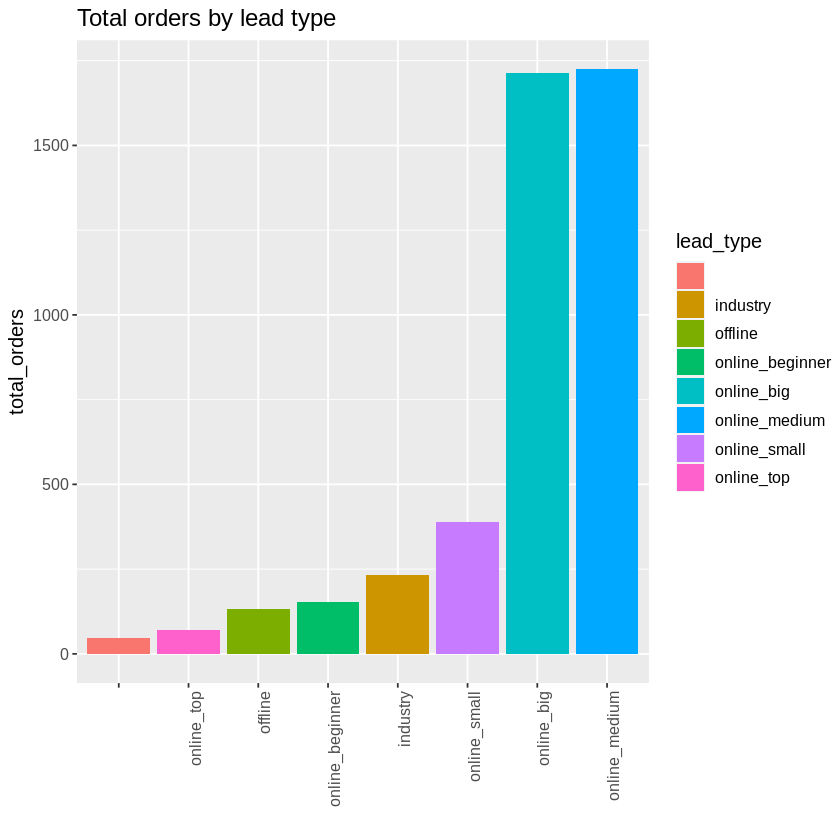

In [ ]:
# Exploring shipments and deliveries made by Lead type of seller
by_lead <- temp3 %>%
    group_by(lead_type) %>%
    summarise(total_shipped_on_time = sum(shipped_on_time), total_delivered_on_time = sum(delivered_on_time), total_orders = n()) %>% 
    mutate(percentage_shipped_on_time = round(total_shipped_on_time/total_orders * 100, 2)) %>%
    mutate(percentage_delivered_on_time = round(total_delivered_on_time/total_orders * 100, 2)) %>%
    mutate(percentage_of_total_deliveries_made = round(total_delivered_on_time/sum(total_orders) * 100, 2)) %>%
    arrange(desc(total_orders))

by_lead
ggplot(aes(x = reorder(lead_type, +total_orders), y = total_orders, fill = lead_type, xlab = ""), data = by_lead) +geom_bar(width = 0.9, stat= "identity", position = "dodge") + 
theme(text = element_text(size=12), axis.text.x = element_text(angle=90, hjust=1)) + 
labs(x = "") +
ggtitle("Total orders by lead type")

#### We see that Online_medium and Online_big dominate in terms of total number of orders. 

lead_type,mean_delivery_time,total_orders
<chr>,<dbl>,<int>
online_big,11.115953,1715
,10.957021,47
online_beginner,10.860658,154
industry,9.674784,233
online_small,9.438208,389
offline,8.930992,133
online_medium,8.659683,1724
online_top,6.029571,71


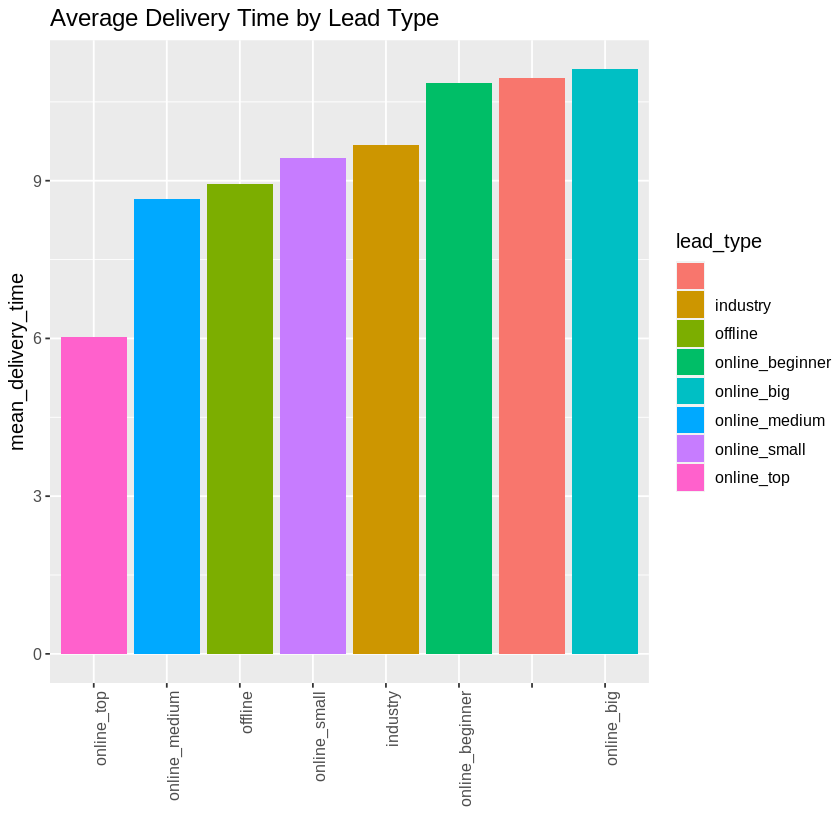

In [ ]:
# Exploring shipping time by Lead type of seller
time_by_lead <- temp3 %>%
    group_by(lead_type) %>%
    summarise(mean_delivery_time = mean(delivery_time, na.rm=T), total_orders = n()) %>% 
    #mutate(percentage_shipped_on_time = round(total_shipped_on_time/count * 100, 2)) %>%
    #mutate(percentage_delivered_on_time = round(total_delivered_on_time/count * 100, 2)) %>%
   # mutate(percentage_of_total_deliveries_made = round(total_delivered_on_time/sum(count) * 100, 2)) %>%
    arrange(desc(mean_delivery_time))

time_by_lead

ggplot(aes(x = reorder(lead_type, +mean_delivery_time), y = mean_delivery_time, fill = lead_type, xlab = ""), data = time_by_lead) +geom_bar(width = 0.9, stat= "identity", position = "dodge") + 
theme(text = element_text(size=12), axis.text.x = element_text(angle=90, hjust=1)) + 
labs(x = "") +
ggtitle("Average Delivery Time by Lead Type")

##### We see that in terms of delivery times, "Online_top" has the best performance of about 6 days on average from the time the order was placed to the time it was delivered to the customer. "Online_medium" is second best with an average of 8.7 days. "Online_big," "Online_beginner" and "Unknown" have the highest average delivery times of about 10~11 days per order, which is quite high.

##### To reduce our shipping times and improve customer satisfaction (and ratings), one strategy may be to attract more sellers from the "Online_top" category, while reducing reliance on "Online_big." 

#### What are the primary origins for our leads?

In [ ]:
temp3 %>% group_by(origin) %>% summarise(Count = n()) %>% arrange(desc(Count))

origin,Count
<chr>,<int>
unknown,1264
paid_search,1230
organic_search,1193
social,391
direct_traffic,190
other,89
referral,69
email,22
,11


origin,total_shipped_on_time,total_delivered_on_time,total_orders,percentage_of_total_deliveries_made
<chr>,<dbl>,<dbl>,<int>,<dbl>
unknown,1133,1135,1264,25.41
paid_search,1109,1123,1230,25.15
organic_search,1139,1118,1193,25.03
social,355,361,391,8.08
direct_traffic,176,173,190,3.87
other,69,75,89,1.68
referral,68,65,69,1.46
email,21,21,22,0.47
,11,10,11,0.22


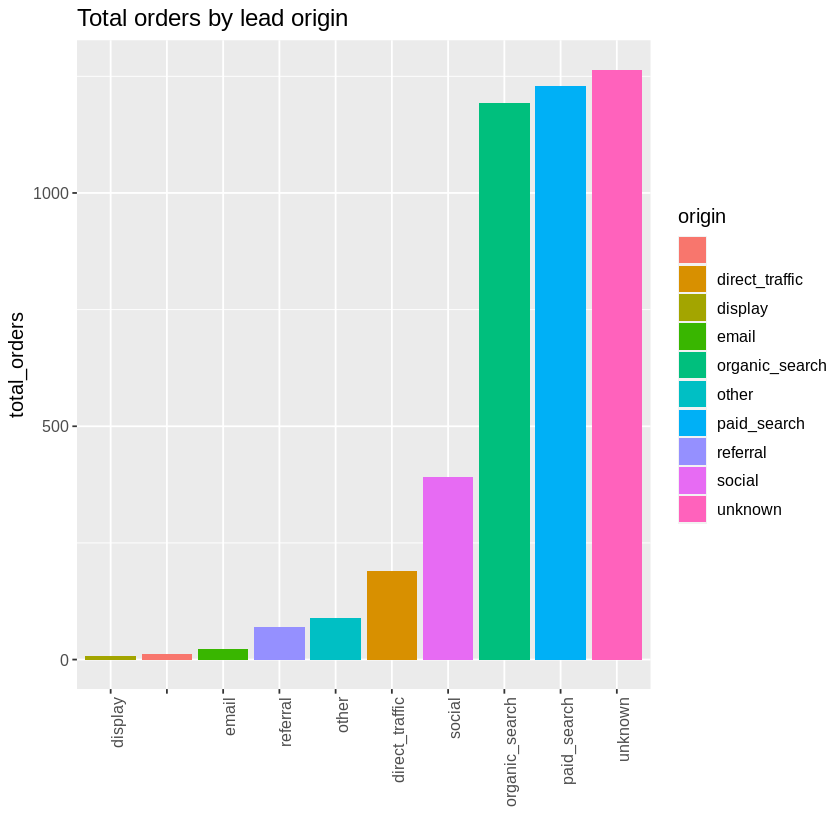

In [ ]:
# Exploring shipments and deliveries made by lead origin in more detail
by_origin <- temp3 %>%
    group_by(origin) %>%
    summarise(total_shipped_on_time = sum(shipped_on_time), total_delivered_on_time = sum(delivered_on_time), total_orders = n()) %>% 
    mutate(percentage_of_total_deliveries_made = round(total_delivered_on_time/sum(total_orders) * 100, 2)) %>%
    arrange(desc(percentage_of_total_deliveries_made))
by_origin 
ggplot(aes(x = reorder(origin, +total_orders), y = total_orders, fill = origin, xlab = ""), data = by_origin) +geom_bar(stat= "identity", position = "dodge") + 
theme(text = element_text(size=12), axis.text.x = element_text(angle=90, hjust=1)) + 
labs(x = "") +
ggtitle("Total orders by lead origin")

##### "Unknown" is the lead source with the most orders. It would be advisable for Olist to track the origin of their leads more consistently, so that this data can be more useful to inform their marketing strategy. Out of the known lead sources, "Paid_search" and "Organic_search" account for the majority of orders with about 25% each. This validates the same finding from the Marketing Funnel dataset EDA above in Section 5.1 that didn't include actual order counts. 


origin,mean_delivery_time,total_orders
<chr>,<dbl>,<int>
unknown,12.071289,1264
direct_traffic,10.075532,190
other,9.956163,89
referral,9.268209,69
paid_search,9.082313,1230
display,9.017143,7
social,8.570464,391
organic_search,8.545179,1193
email,8.322273,22


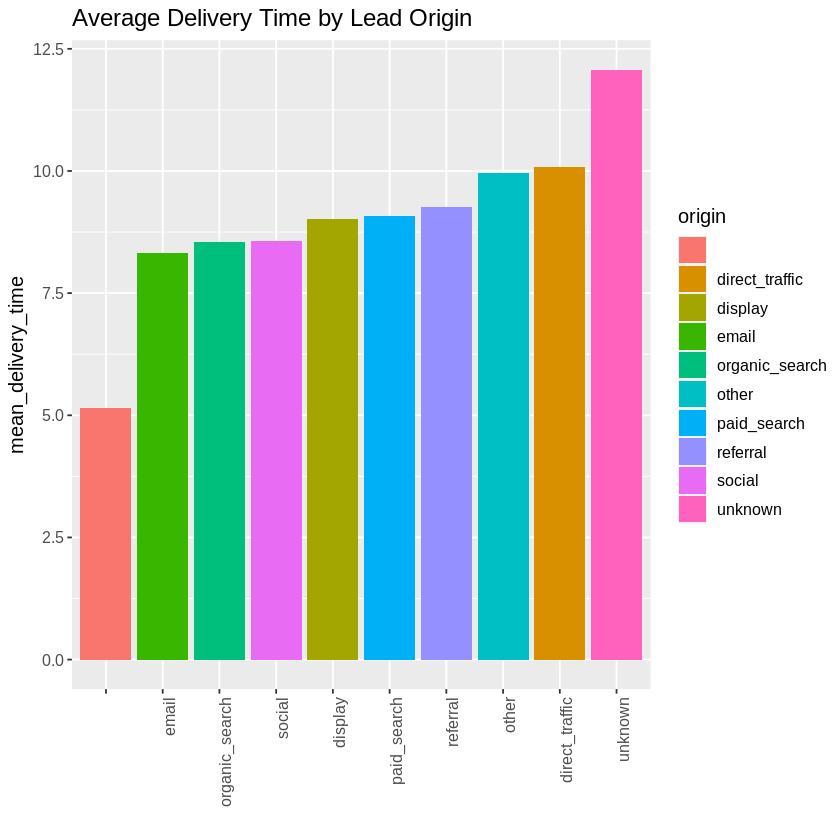

In [ ]:
# Exploring shipping time by origin of seller
time_by_origin <- temp3 %>%
    group_by(origin) %>%
    summarise(mean_delivery_time = mean(delivery_time, na.rm=T), total_orders = n()) %>% 
    arrange(desc(mean_delivery_time))
time_by_origin
ggplot(aes(x = reorder(origin, +mean_delivery_time), y = mean_delivery_time, fill = origin, xlab = ""), data = time_by_origin) +geom_bar(width = 0.9, stat= "identity", position = "dodge") + 
theme(text = element_text(size=12), axis.text.x = element_text(angle=90, hjust=1)) + 
labs(x = "") +
ggtitle("Average Delivery Time by Lead Origin")

##### The average delivery time by lead origin appears to be less varied and fairly consistent between 8-10 days with the exception of leads that list no origin (i.e. origin == ""). This is interesting, because this particular subset shows the shortest delivery time of 5 days for a total of 11 orders. It would be useful to examine this further. Also, "Unknown" source shows the longest average delivery time of 12 days, which again should be enough reason to track the lead sources more accurately.

##### I now want to examine the close times of our representatives: how much time it took from first contact with a potential seller to the time they were signed up onto the Olist platform.

In [ ]:
# Adding a column to original Marketing Funnel dataset
mkt_data <- mkt_data %>% mutate(lead_to_close = round(as.numeric(difftime(won_date, first_contact_date, units ="days")),2))
# Taking a look at average lead_to_close time per Sales Representative
close_times <- mkt_data %>%
    group_by(sr_id) %>%
    mutate(mean_close_time = round(mean(lead_to_close, na.rm=T)), 2) %>%
    mutate(total_deals_closed = n()) %>%
    distinct(sr_id, mean_close_time, total_deals_closed) %>%
    arrange(desc(mean_close_time))
cat('\n All sellers by descending average close time')
close_times
cat('\n Top 5 sellers by shortest average close time')
head(close_times %>% arrange(mean_close_time), 5)
# Average close time among all Sales Reps
cat('\n Average close time among all Sales Reps = ', round(mean(close_times$mean_close_time, na.rm=T)), 'days')


 All sellers by descending average close time

sr_id,mean_close_time,total_deals_closed
<chr>,<dbl>,<int>
6aa3b86a83d784b05f0e37e26b20860d,322,1
0a0fb2b07d841f84fb6714e35c723075,307,1
9749123c950bf8363ace42cb1c2d0815,234,7
9d12ef1a7eca3ec58c545c678af7869c,215,6
4b339f9567d060bcea4f5136b9f5949e,181,9
b90f87164b5f8c2cfa5c8572834dbe3f,176,1
34d40cdaf94010a1d05b0d6212f9e909,173,10
068066e24f0c643eb1d089c7dd20cd73,123,27
a8387c01a09e99ce014107505b92388c,97,26



 Top 5 sellers by shortest average close time

sr_id,mean_close_time,total_deals_closed
<chr>,<dbl>,<int>
9e4d1098a3b0f5da39b0bc48f9876645,17,24
fbf4aef3f6915dc0c3c97d6812522f6a,23,59
c638112b43f1d1b86dcabb0da720c901,23,36
060c0a26f19f4d66b42e0d8796688490,26,32
6565aa9ce3178a5caf6171827af3a9ba,26,74



 Average close time among all Sales Reps =  105 days

##### One important KPI to keep track of is the average lead_to_close days for each Sales Rep. SRs are there to close deals, and if they take a long time to close deals, unless they are closing big clients, they are underperforming. The top 5 Sales Representative close within 22 days on average, but our overall is 105 days. There are some clear inconsistencies here in terms of the close time of our reps that should be addressed. While it may be acceptable to have longer close times for very large and important sellers, the average time should be closer to the top performers

#### What is the average sales conversion time by business type?


 Average close time by business type

business_type,average_time
<chr>,<dbl>
manufacturer,46.06959
other,254.46333
reseller,49.79279



 Total numbers of sellers by business type

business_type,Count
<chr>,<int>
reseller,587
manufacturer,242
other,3



 Information on the only three sellers listed as "Other" under business_type:

mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,lead_to_close
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
20fcec0873b39b4df3df34140d77d6e7,2018-01-12,22c29808c4f815213303f8933030604c,organic_search,cee3c487c56d29554a22d112af618301,084b6fbb10729ed4da8c3d3f5a3ae7c9,0a0fb2b07d841f84fb6714e35c723075,2018-11-14 18:04:19,other,other,cat,False,False,1-5,other,120,6000,306.75
9dde4d7713ae64986ab6f5c9f9cf94d3,2018-04-28,22c29808c4f815213303f8933030604c,organic_search,c33e6d3ad32fd5bec1b0f2522f668213,19f3cd308f1455b3fa09a282e0d496f4,a8387c01a09e99ce014107505b92388c,2018-11-09 20:06:38,other,other,cat,,,,other,100,500000,195.84
d5cb61eef98bd237e41bc2225263f823,2018-02-25,f017be4dbf86243af5c1ebed0cff36a2,paid_search,7e1f0755f1c75e301dfa37c21fd01efe,e4a6222cdb5b34375400904f03d8e6a5,34d40cdaf94010a1d05b0d6212f9e909,2018-11-12 19:17:25,other,other,"eagle, wolf",True,True,5-20,other,305,120000,260.80


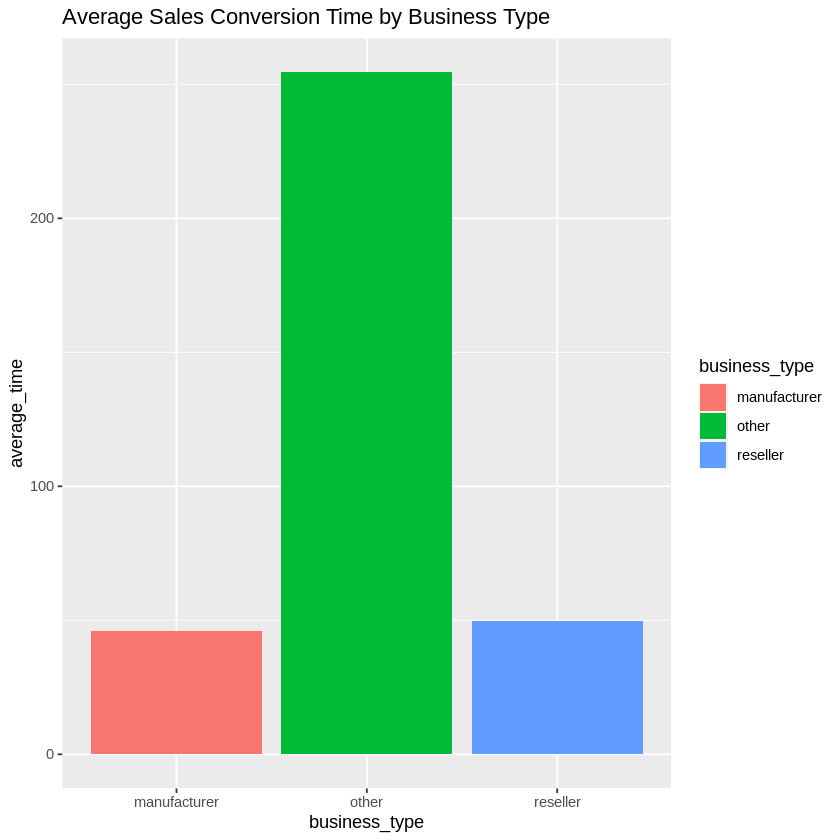

In [ ]:
cat('\n Average close time by business type')
by_business <- mkt_data %>% filter (!business_type == "") %>% group_by(business_type) %>% summarise(average_time = mean(lead_to_close))
by_business
cat('\n Total numbers of sellers by business type')
mkt_data %>% filter (!business_type == "") %>% group_by(business_type) %>% summarise(Count = n()) %>% arrange(desc(Count))
ggplot(aes(x= business_type, y= average_time, fill = business_type), data = by_business) + geom_bar(stat ="identity") +
ggtitle("Average Sales Conversion Time by Business Type")
cat('\n Information on the only three sellers listed as "Other" under business_type:')
mkt_data %>% filter (business_type == "other") #%>% select(origin, lead_type) #%>% summarise(Count = n()) %>% arrange(desc(Count))


#### Manufacturer and Reseller show average close times fairly close to each other. However, "Other" is 200 days on average. While these businesses represent a very small number of the total (3 out of more than 800 total), this is still something that Olist may want to investigate further to pinpoint the exact reasons for this difference of *more than 150 days* on average. 
#### Let's now look at the sellers by business type and their respective lead channels.

`summarise()` has grouped output by 'business_type'. You can override using the
`.groups` argument.


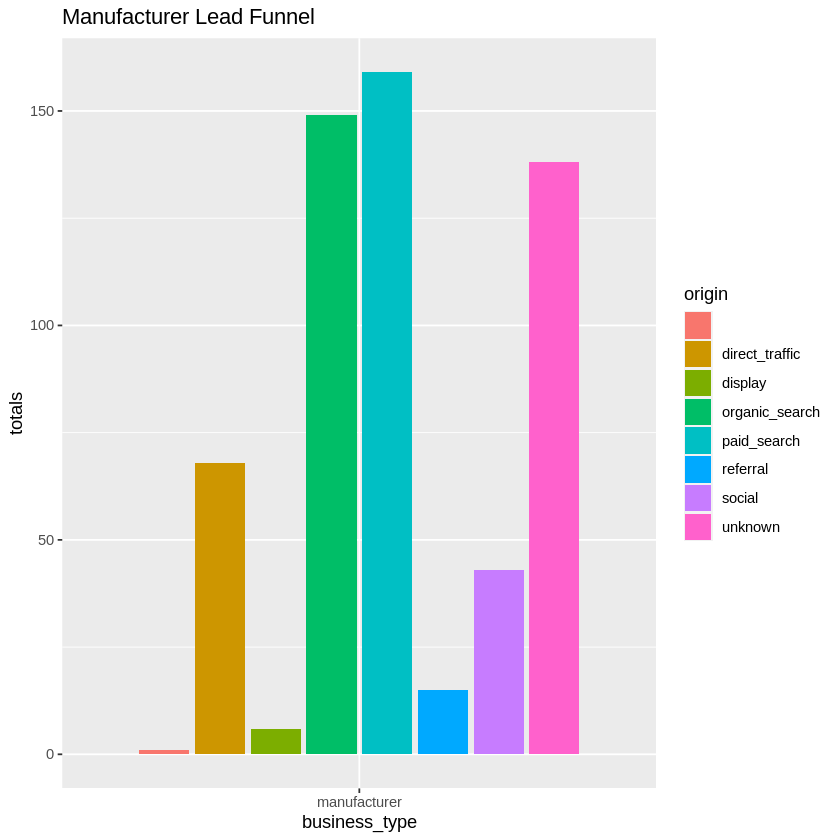

In [ ]:
avgconversion <- temp3 %>% group_by(business_type,origin) %>% summarise(totals = n()) 
manufacturer <- avgconversion %>% 
     select(business_type, origin, totals) %>% 
     filter(business_type == "manufacturer")
ggplot(aes(x = business_type, y =totals, fill = origin), data = manufacturer) +geom_bar(stat= "identity", position = "dodge2") + ggtitle("Manufacturer Lead Funnel")


#### We see that for sellers who are manufacturers, the top lead sources are **organic** and **paid search**. Again, there are a lot of unknown leads, which needs to be looked into to better inform marketing. Direct traffic is the third major source of leads for manufacturers. Most likely, this is because customers are already familiar with these companies and their brands. 

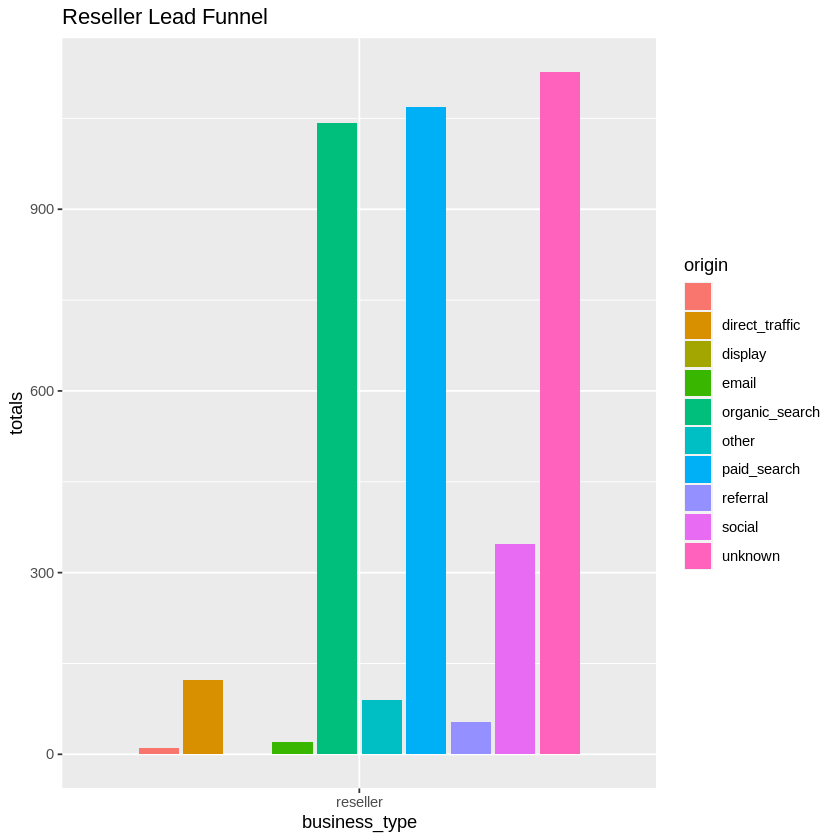

In [ ]:
reseller <- avgconversion %>% select(business_type, origin, totals) %>% filter(business_type == "reseller")
ggplot(aes(x = business_type, y = totals, fill = origin), data = reseller) +geom_bar(stat= "identity", position = "dodge2") + ggtitle("Reseller Lead Funnel")

#### For resellers, the two main sources of leads are still organic and paid search. Interestingly, the third highest lead origin here is different -- **social** instead of direct traffic (ignoring "unknown"). This makes sense as resellers aren't likely to be as well-known or recognized by consumers as the actual product manufacturers. Thus, customers will first need to find these resellers through social media, email, blogs, search engines and other marketing channels.

#### The above two graphs show us the total breakdown of leads for the two major categories of sellers on the Olist platform: **Manufacturer** and **Reseller**. For both types of businesses, paid and organic search are already working effectively. Organic search doesn't cost US anything, which is great news. For paid search, we may want to compare the cost per lead with other channels, such as social and referrals. It may be more cost effective for Olist to pay for their leads through social media advertising, a referral program or email. 
#### Secondly, the large swathes of "unknown" leads for both types of businesses really deserve our serious attention. As these leads represent the majority in both categories, we are missing out on a big opportunity to capitalize on this source (or multiple sources) of leads driven to our website. If anything, the Marketing team at Olist needs to first invest its time and resources into figuring out a way to track and classify these "unknown" leads. This may require a website redesign with better tracking functionality, as well as using more sophisticated web analytics tools.